# Proyek Analisis Data: E-Commerce Public Dataset

-   **Nama:** Jordan Marcelino
-   **Email:** jhordan.marcelino@gmail.com
-   **ID Dicoding:** jordanmarz


## Menentukan Pertanyaan Bisnis


-   Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual ?
-   Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?
-   Pertanyaan 3: Di kota manakah order paling banyak dilakukan ?
-   Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?
-   Pertanyaan 5: Berapa lama order customer diterima oleh seller ?
-   Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?
-   Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?
-   Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?
-   Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?
-   Pertanyaan 10: Bagaimanakah demografi customer ?
-   Pertanyaan 11: Bagaimanakah demografi seller ?


## Import Semua Packages/Library yang Digunakan


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

sns.set_style("dark")

## Data Wrangling


### Gathering Data

Menyimpan semua dataset dalam sebuah dictionary


In [2]:
list_df: dict[str, pd.DataFrame] = {}

for filename in os.listdir("data"):
    key = filename.split(".")[0]
    list_df[key] = pd.read_csv(f"data/{filename}")

In [3]:
list_df["customers_dataset"].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data


In [4]:
def asses_data(df: pd.DataFrame) -> None:
    """
    Fungsi untuk mengecek apakah terdapat missing values & data duplikat pada dataset
    """
    print(df.info())
    print(df.isna().sum())

    print(f"Terdapat data duplikat sebanyak: {df.duplicated().sum()}")

In [5]:
asses_data(list_df["customers_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [6]:
asses_data(list_df["geolocation_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Terdapat data duplikat sebanyak: 261831


In [7]:
asses_data(list_df["order_items_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [8]:
asses_data(list_df["order_payments_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [9]:
asses_data(list_df["order_reviews_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [10]:
asses_data(list_df["orders_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

In [11]:
asses_data(list_df["product_category_name_translation"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [12]:
asses_data(list_df["products_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
prod

In [13]:
asses_data(list_df["sellers_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Terdapat data duplikat sebanyak: 0


### Cleaning Data

Berdasarkan proses assesing data, terdapat 4 dataset yang perlu dilakukan proses cleaning yaitu;

1. geolocation_dataset
2. orders_review_dataset
3. orders_dataset
4. products_dataset


### Proses cleaning data pada geolocation_dataset

-   Menghapus data duplikat


In [14]:
list_df["geolocation_dataset"] = list_df["geolocation_dataset"].drop_duplicates()

list_df["geolocation_dataset"].duplicated().sum()

0

### Proses cleaning data pada orders_review_dataset

-   Mengatasi missing values dengan mengisinya menggunakan string kosong (''), karena kemungkinan besar user memang tidak memberikan review komen, namun tetap memberikan rating


In [15]:
list_df["order_reviews_dataset"] = list_df["order_reviews_dataset"].fillna("")

list_df["order_reviews_dataset"].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Proses cleaning data pada orders_dataset

-   Mengatasi missing values pada kolom dengan membuang datanya, karena kita tidak bisa mengambil informasi yang berharga dari order yang dicancel, belum dikirim, atau pun belum sampai.


In [16]:
list_df["orders_dataset"][list_df["orders_dataset"].isna().any(axis=1)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [17]:
list_df["orders_dataset"] = list_df["orders_dataset"].dropna()
list_df["orders_dataset"].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Proses cleaning data pada products_dataset

-   Mengatasi missing values dengan membuang datanya, karena kita tidak memiliki informasi yang cukup untuk mengisi missing values, dan jika dilakukan imputasi hanya akan menyebabkan missleading


In [18]:
list_df["products_dataset"][list_df["products_dataset"].isna().any(axis=1)].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [19]:
list_df["products_dataset"] = list_df["products_dataset"].dropna()
list_df["products_dataset"].isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)


Karena satu zipcode bisa terdapat banyak lat dan long, maka dapat diatasi dengan cara mengambil satu perwakilan lat dan long untuk satu zipcode


In [20]:
geolocation_unique = (
    list_df["geolocation_dataset"]
    .groupby("geolocation_zip_code_prefix")
    .first()
    .reset_index()
)

geolocation_unique.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP


### Menggabungkan dataset customers dan orders


In [21]:
order_items_payments = pd.merge(
    list_df["order_items_dataset"], list_df["order_payments_dataset"], on="order_id"
)
order_items_payments_reviews = pd.merge(
    order_items_payments, list_df["order_reviews_dataset"], on="order_id"
)

all_orders = pd.merge(
    list_df["orders_dataset"], order_items_payments_reviews, on="order_id"
)
orders_products = pd.merge(all_orders, list_df["products_dataset"], on="product_id")

customers_orders = pd.merge(
    list_df["customers_dataset"], orders_products, on="customer_id"
)

In [22]:
customers_orders = customers_orders[
    customers_orders["order_delivered_customer_date"]
    > customers_orders["order_delivered_carrier_date"]
]

In [23]:
customers_orders.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0


In [24]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113148 entries, 0 to 113215
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113148 non-null  object 
 1   customer_unique_id             113148 non-null  object 
 2   customer_zip_code_prefix       113148 non-null  int64  
 3   customer_city                  113148 non-null  object 
 4   customer_state                 113148 non-null  object 
 5   order_id                       113148 non-null  object 
 6   order_status                   113148 non-null  object 
 7   order_purchase_timestamp       113148 non-null  object 
 8   order_approved_at              113148 non-null  object 
 9   order_delivered_carrier_date   113148 non-null  object 
 10  order_delivered_customer_date  113148 non-null  object 
 11  order_estimated_delivery_date  113148 non-null  object 
 12  order_item_id                  1131

In [25]:
customers_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,113148.0,35086.918876,29867.653134,1003.00,11310.00,24315.00,58868.7500,99980.00
order_item_id,113148.0,1.194692,0.686937,1.00,1.00,1.00,1.0000,21.00
price,113148.0,119.888436,181.172068,0.85,39.90,74.90,133.0000,6735.00
freight_value,113148.0,20.004732,15.712685,0.00,13.08,16.32,21.1900,409.68
payment_sequential,113148.0,1.090704,0.686564,1.00,1.00,1.00,1.0000,26.00
payment_installments,113148.0,2.943004,2.778852,0.00,1.00,2.00,4.0000,24.00
payment_value,113148.0,171.575046,264.288675,0.00,60.85,107.94,189.0825,13664.08
review_score,113148.0,4.082989,1.345634,1.00,4.00,5.00,5.0000,5.00
product_name_lenght,113148.0,48.803841,10.015525,5.00,42.00,52.00,57.0000,76.00
product_description_lenght,113148.0,784.807067,650.317505,4.00,346.00,600.00,982.0000,3992.00


### Mengubah tipe data kolom yang memiliki value date menjadi datetime


In [26]:
date_columns = [
    "shipping_limit_date",
    "review_creation_date",
    "review_answer_timestamp",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

In [27]:
for column in date_columns:
    customers_orders[column] = pd.to_datetime(customers_orders[column])

customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113148 entries, 0 to 113215
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113148 non-null  object        
 1   customer_unique_id             113148 non-null  object        
 2   customer_zip_code_prefix       113148 non-null  int64         
 3   customer_city                  113148 non-null  object        
 4   customer_state                 113148 non-null  object        
 5   order_id                       113148 non-null  object        
 6   order_status                   113148 non-null  object        
 7   order_purchase_timestamp       113148 non-null  datetime64[ns]
 8   order_approved_at              113148 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113148 non-null  datetime64[ns]
 10  order_delivered_customer_date  113148 non-null  datetime64[ns]
 11  order

### Menambahkan kolom baru yang dapat menambahkan informasi

-   orders_delivery_time = berapa lama pengiriman order
-   order_received_hours = berapa lama order diterima seller dalam satuan waktu jam
-   order_received_minutes = berapa lama order diterima seller dalam satuan waktu menit
-   reviewed_answered_hour = berapa lama review user dibalas seller dalam satuan jam
-   orders_days = pada hari apakah order dilakukan
-   orders_weekend = apakah order dilakukan pada weekend atau tidak
-   orders_months = pada bulan apakah order dilakukan


In [28]:
orders_delivery_time = (
    customers_orders["order_delivered_customer_date"]
    - customers_orders["order_delivered_carrier_date"]
).dt.days

In [29]:
orders_received_hours = (
    customers_orders["order_approved_at"] - customers_orders["order_purchase_timestamp"]
).dt.total_seconds() // 3600
orders_received_minutes = (
    (
        customers_orders["order_approved_at"]
        - customers_orders["order_purchase_timestamp"]
    ).dt.total_seconds()
    % 3600
) // 60

In [30]:
reviews_answered_hours = (
    customers_orders["review_answer_timestamp"]
    - customers_orders["review_creation_date"]
).dt.total_seconds() // 3600

In [31]:
orders_days = customers_orders["order_purchase_timestamp"].dt.day_name()
orders_weekend = customers_orders["order_purchase_timestamp"].dt.weekday.apply(
    lambda day: True if day in [5, 6] else False
)
orders_months = customers_orders["order_purchase_timestamp"].dt.month_name()

In [32]:
customers_orders["orders_delivery_time"] = orders_delivery_time
customers_orders["orders_received_hours"] = orders_received_hours
customers_orders["orders_received_minutes"] = orders_received_minutes
customers_orders["reviews_answered_hours"] = reviews_answered_hours
customers_orders["orders_day"] = orders_days
customers_orders["orders_weekend"] = orders_weekend
customers_orders["orders_month"] = orders_months

### Mengabungkan seluruh dataset menjadi satu dan menyimpan hasil akhir


In [33]:
customers_sellers = pd.merge(
    customers_orders, list_df["sellers_dataset"], on="seller_id"
)
all_df = pd.merge(
    customers_sellers,
    list_df["product_category_name_translation"],
    on="product_category_name",
)

In [34]:
all_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,orders_received_hours,orders_received_minutes,reviews_answered_hours,orders_day,orders_weekend,orders_month,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,0.0,16.0,118.0,Tuesday,False,May,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,0.0,10.0,286.0,Friday,False,January,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,24.0,11.0,12.0,Saturday,True,May,8577,itaquaquecetuba,SP,office_furniture


In [35]:
all_df.to_csv("dashboard/all_final.csv", index=False)
geolocation_unique.to_csv("dashboard/geolocation_final.csv", index=False)

## Visualization & Explanatory Analysis


### Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual


In [36]:
top_products_sales = (
    all_df.groupby("product_category_name_english")
    .agg({"order_id": "nunique"})
    .sort_values(by="order_id", ascending=False)
    .reset_index()
    .rename(
        columns={
            "order_id": "order_count",
            "product_category_name_english": "product_name",
        }
    )
)

Text(0.5, 0.98, 'Best and Worst Performing Product by Number of Sales')

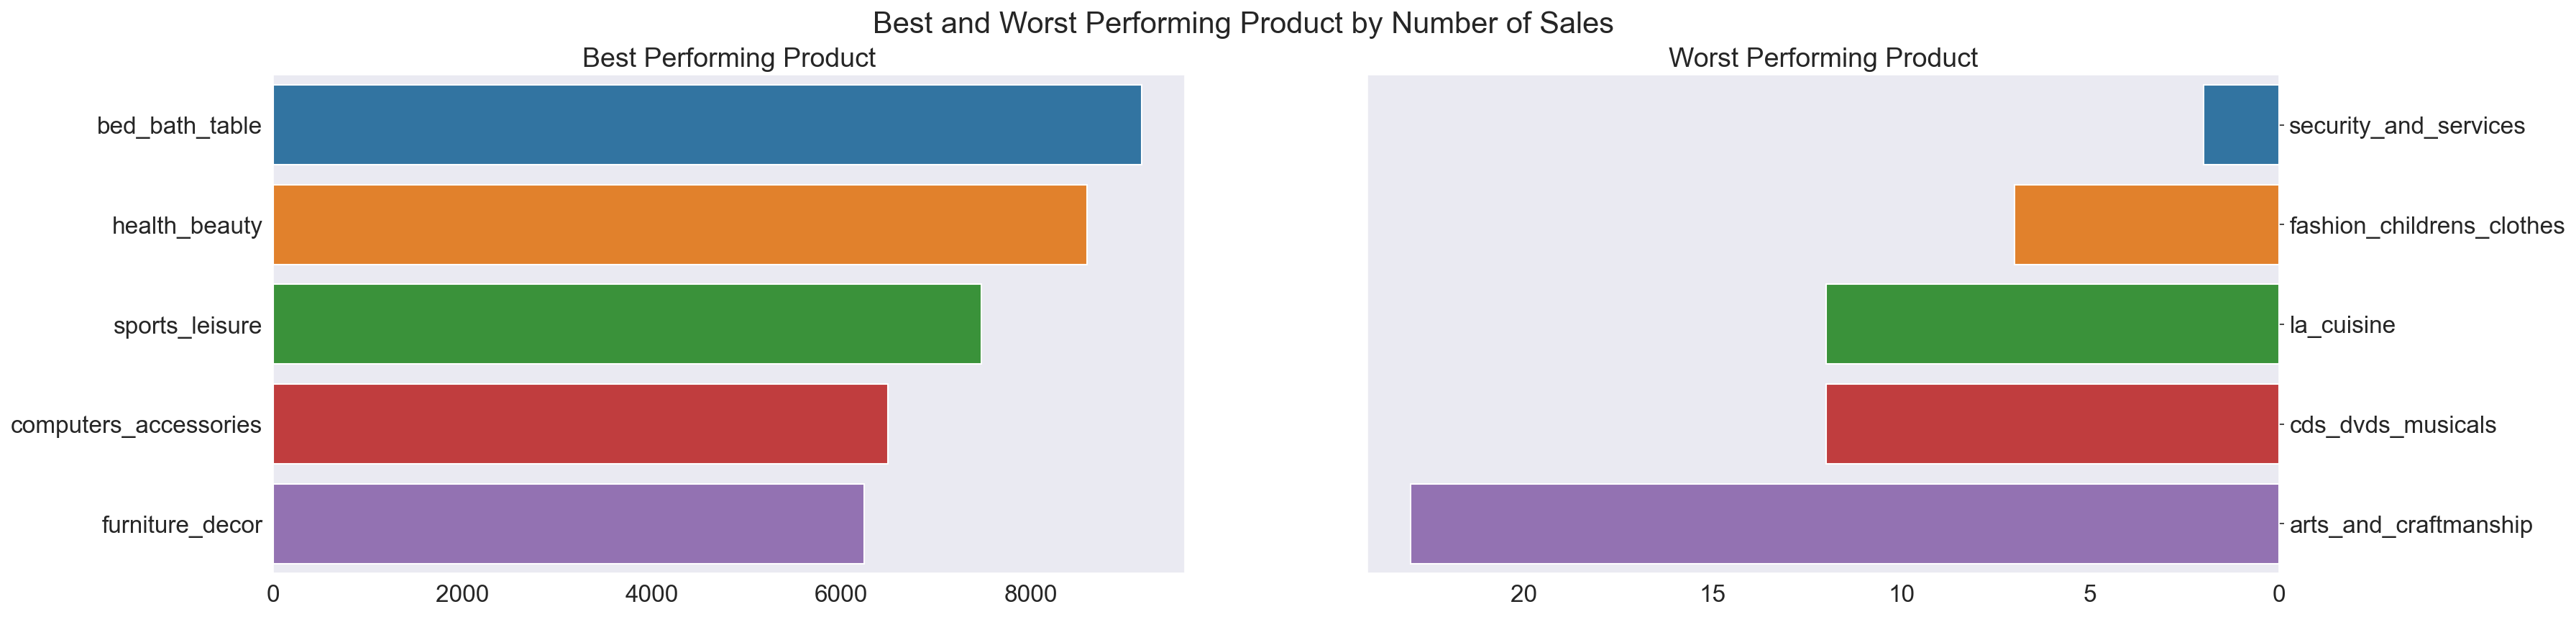

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(
    x="order_count",
    y="product_name",
    data=top_products_sales.head(),
    ax=ax[0],
    hue="product_name",
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=16)

sns.barplot(
    x="order_count",
    y="product_name",
    data=top_products_sales.sort_values(by="order_count", ascending=True).head(),
    ax=ax[1],
    hue="product_name",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)

### Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?


In [38]:
top_products_reviews = (
    all_df.groupby("product_category_name_english")
    .agg({"review_score": "mean"})
    .sort_values(by="review_score", ascending=False)
    .reset_index()
    .rename(
        columns={
            "review_score": "rating",
            "product_category_name_english": "product_name",
        }
    )
)

Text(0.5, 0.98, 'Best and Worst Product by Rating')

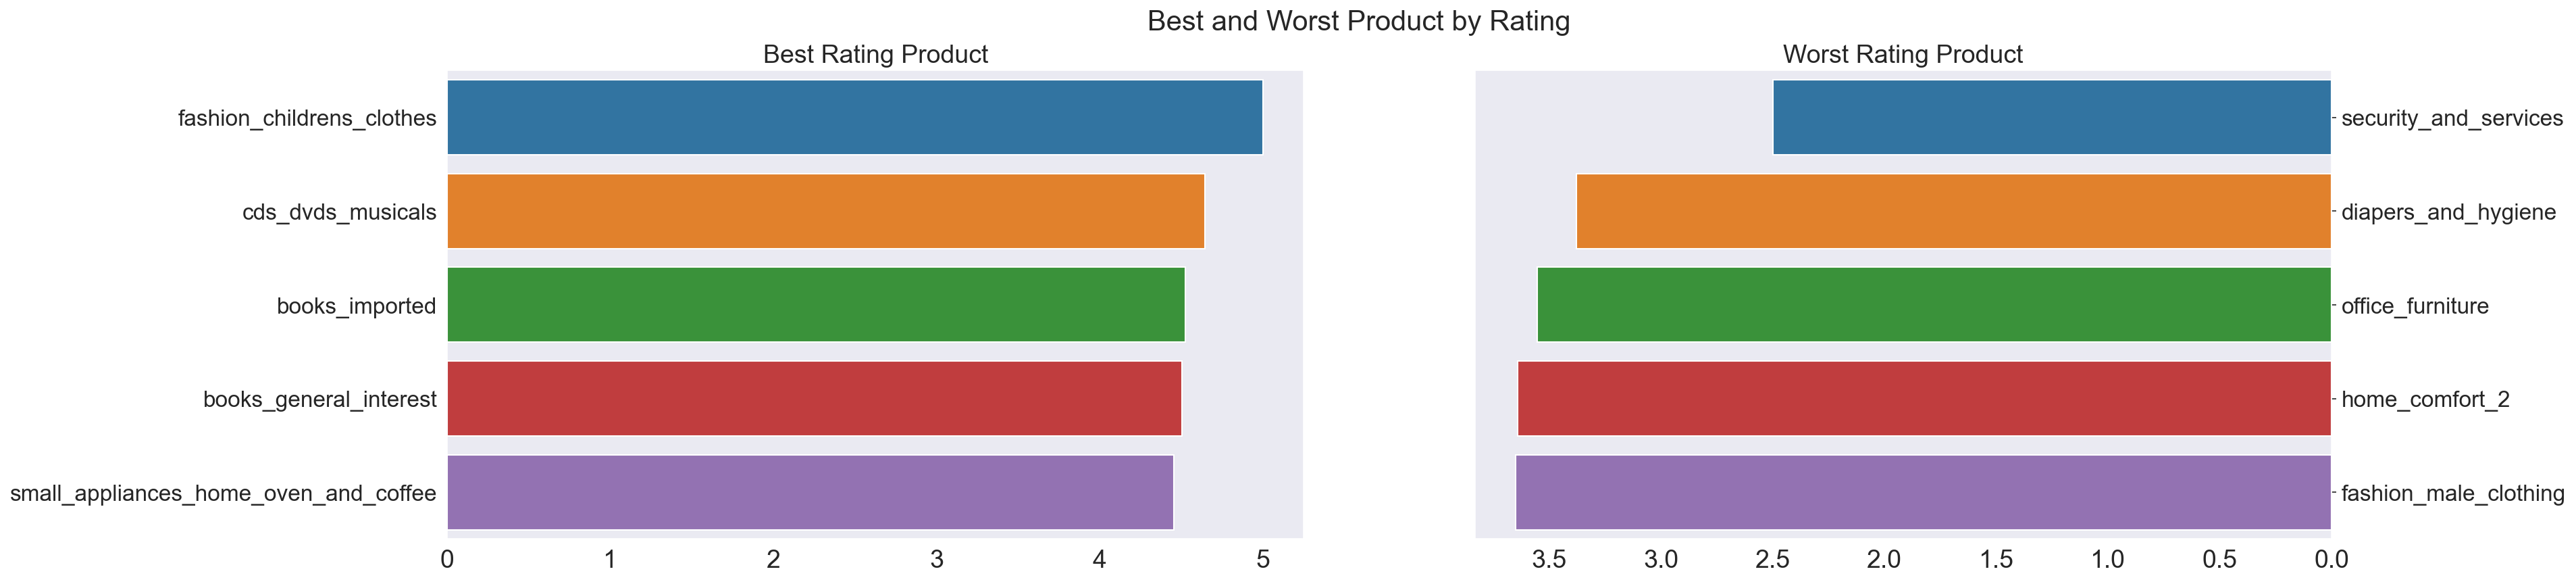

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(
    x="rating",
    y="product_name",
    data=top_products_reviews.head(),
    ax=ax[0],
    hue="product_name",
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Rating Product", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="rating",
    y="product_name",
    data=top_products_reviews.sort_values(by="rating", ascending=True).head(),
    ax=ax[1],
    hue="product_name",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Rating Product", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Best and Worst Product by Rating", fontsize=20)

### Pertanyaan 3: Di kota manakah order paling banyak ?


In [40]:
orders_city = (
    all_df.groupby(["customer_city"])
    .agg({"order_id": "nunique"})
    .sort_values(by="order_id", ascending=False)
    .reset_index()
    .rename(
        columns={
            "order_id": "order_count",
        }
    )
)

([<matplotlib.patches.Wedge at 0x1f13dad2df0>,
 [Text(-0.5973552565406753, -0.9236702320001572, 'sao paulo'),
  Text(1.0539532962745088, 0.31493245191961045, 'rio de janeiro'),
  Text(0.25810016871338914, 1.0692914957625541, 'belo horizonte'),
  Text(-0.32566581636328984, 1.0506863357122487, 'brasilia'),
  Text(-0.7117546211348054, 0.8386926488847092, 'curitiba')],
 [Text(-0.32583013993127746, -0.5038201265455402, '53.9%'),
  Text(0.574883616149732, 0.1717813374106966, '23.6%'),
  Text(0.14078191020730316, 0.5832499067795749, '9.7%'),
  Text(-0.17763589983452172, 0.5731016376612265, '7.5%'),
  Text(-0.3882297933462574, 0.4574687175734776, '5.4%')])

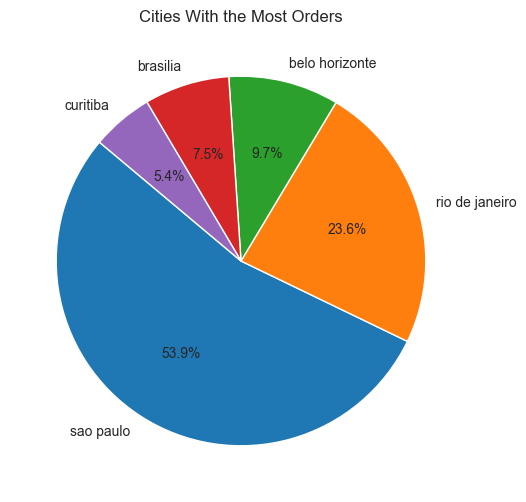

In [41]:
plt.figure(figsize=(25, 6))
plt.title("Cities With the Most Orders")
plt.pie(
    orders_city.head()["order_count"],
    labels=orders_city.head()["customer_city"],
    autopct="%1.1f%%",
    startangle=140,
)

### Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?


In [42]:
seller_revenue = (
    all_df.groupby(["seller_city"])
    .agg({"price": "sum"})
    .sort_values(by="price", ascending=False)
    .reset_index()
)

Text(0.5, 0.98, 'Best and Worst Revenue by City')

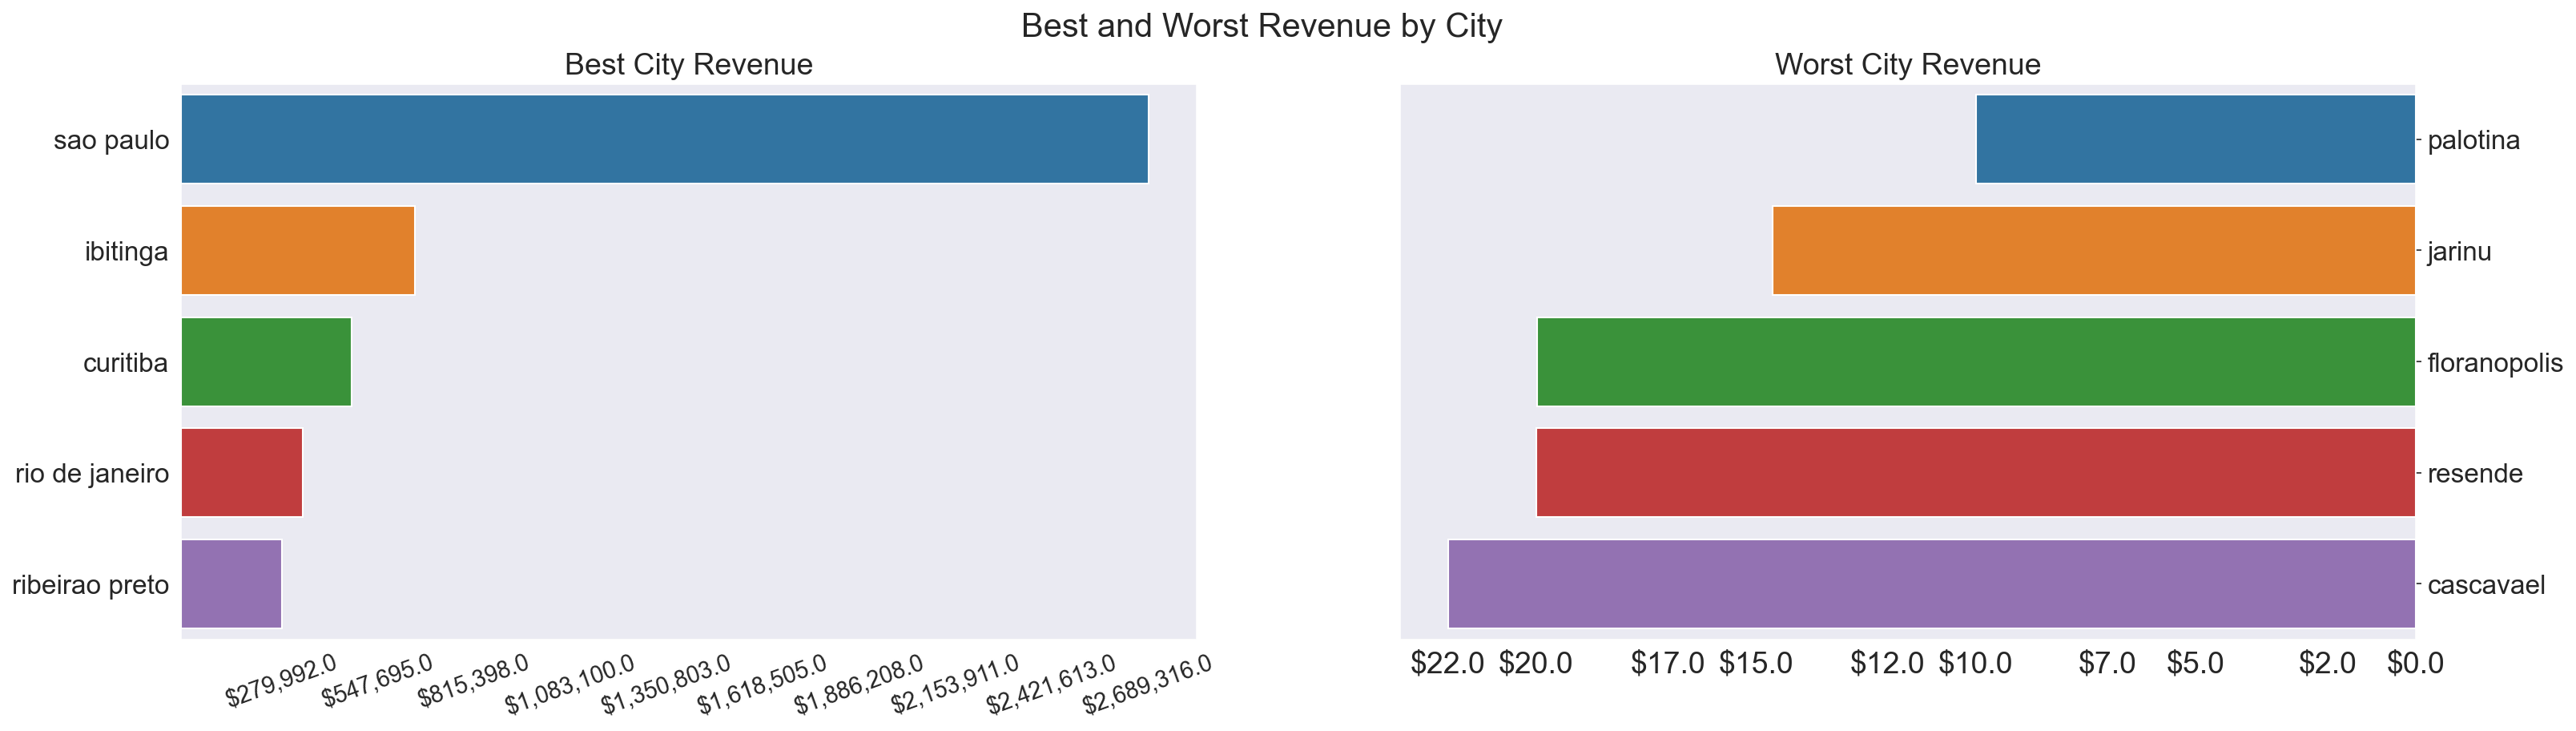

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

xticks = np.linspace(
    seller_revenue.head()["price"].min(), seller_revenue.head()["price"].max(), 10
).round()
sns.barplot(
    x="price", y="seller_city", data=seller_revenue.head(), ax=ax[0], hue="seller_city"
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best City Revenue", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels([f"${revenue:,}" for revenue in xticks], rotation=20)

worst_sales = seller_revenue.sort_values(by="price", ascending=True).head()
xticks = np.linspace(0, worst_sales.head()["price"].max(), 10).round()
sns.barplot(x="price", y="seller_city", data=worst_sales, ax=ax[1], hue="seller_city")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst City Revenue", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels([f"${revenue:,}" for revenue in xticks])

plt.suptitle("Best and Worst Revenue by City", fontsize=20)

### Pertanyaan 5: Berapa lama order customer diterima oleh seller ?


In [44]:
orders_approved = (
    all_df.groupby(["orders_received_hours", "orders_received_minutes"])
    .agg({"order_id": "nunique"})
    .sort_values(["orders_received_hours", "orders_received_minutes"])
    .reset_index()
)
orders_approved["label"] = orders_approved.apply(
    lambda row: f"{int(row['orders_received_hours'])}h {int(row['orders_received_minutes'])}m",
    axis=1,
)

Text(0.5, 0.98, 'Order Approved Time')

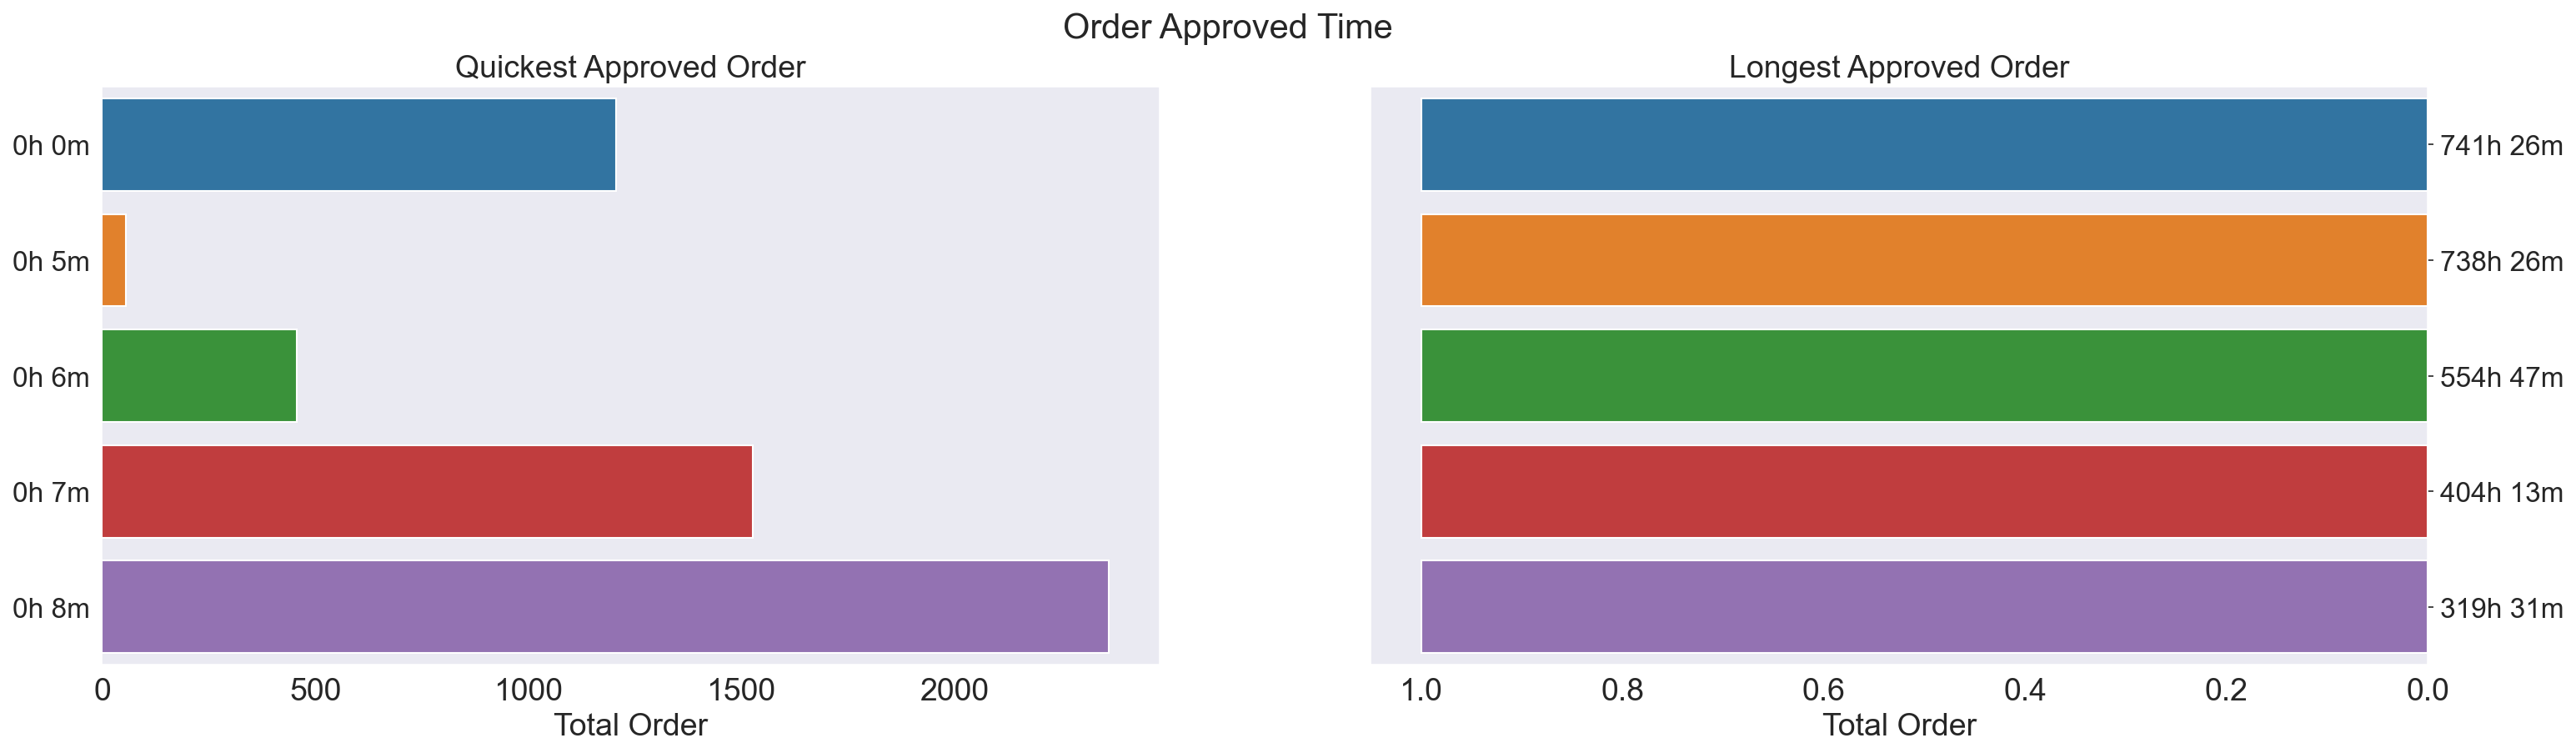

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="order_id", y="label", data=orders_approved.head(), ax=ax[0], hue="label")
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Order", fontsize=18)
ax[0].set_title("Quickest Approved Order", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="label",
    data=orders_approved.sort_values(
        ["orders_received_hours", "orders_received_minutes"], ascending=False
    ).head(),
    ax=ax[1],
    hue="label",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Order", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Longest Approved Order", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Order Approved Time", fontsize=20)

### Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?


In [46]:
delivery_time = (
    all_df.groupby("orders_delivery_time")
    .agg({"order_id": "nunique"})
    .reset_index()
    .sort_values("orders_delivery_time")
)
delivery_time["label"] = delivery_time.apply(
    lambda rows: f"{int(rows['orders_delivery_time'])} days", axis=1
)

Text(0.5, 0.98, 'Order Delivery Time (day)')

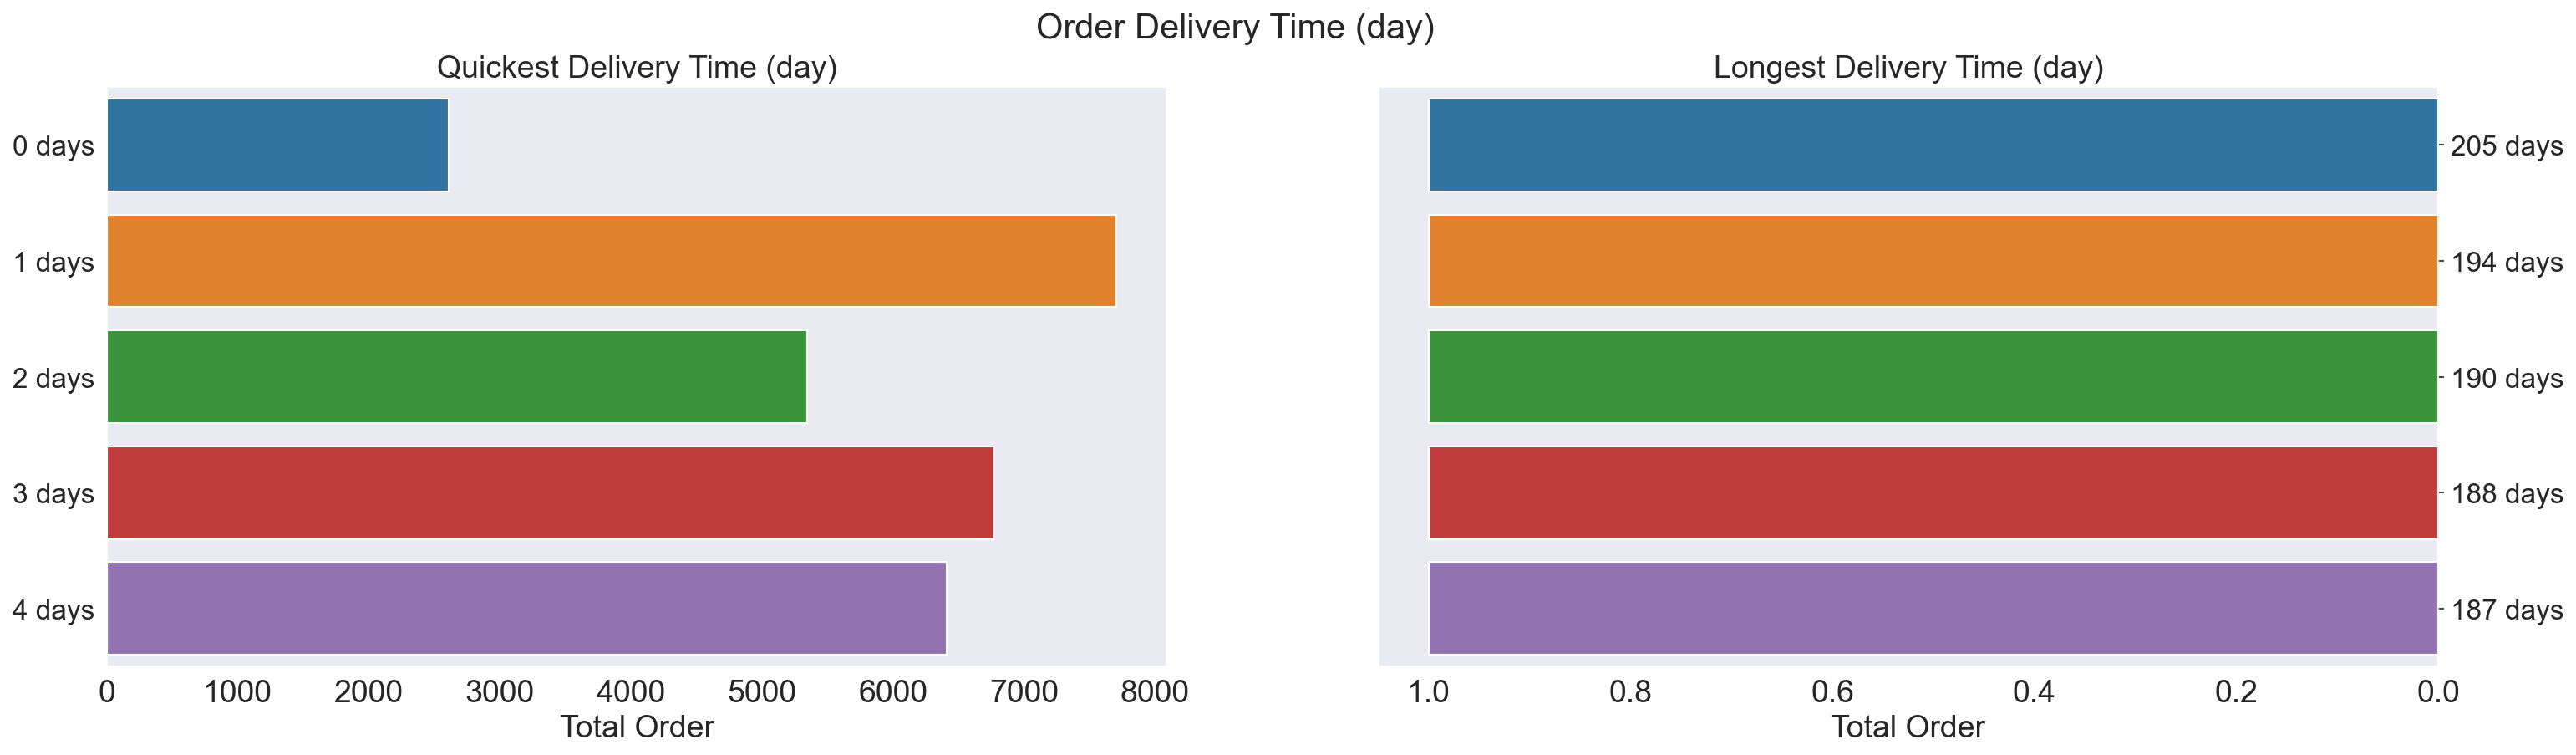

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="order_id", y="label", data=delivery_time.head(), ax=ax[0], hue="label")
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Order", fontsize=18)
ax[0].set_title("Quickest Delivery Time (day)", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="label",
    data=delivery_time.sort_values(by="orders_delivery_time", ascending=False).head(),
    ax=ax[1],
    hue="label",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Order", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Longest Delivery Time (day)", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Order Delivery Time (day)", fontsize=20)

### Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?


In [48]:
reviews_answered = (
    all_df.groupby("reviews_answered_hours")
    .agg({"order_id": "nunique"})
    .reset_index()
    .sort_values("reviews_answered_hours")
)
reviews_answered["label"] = reviews_answered.apply(
    lambda rows: f"{int(rows['reviews_answered_hours'])} h", axis=1
)

Text(0.5, 0.98, 'Review Response Time (hour)')

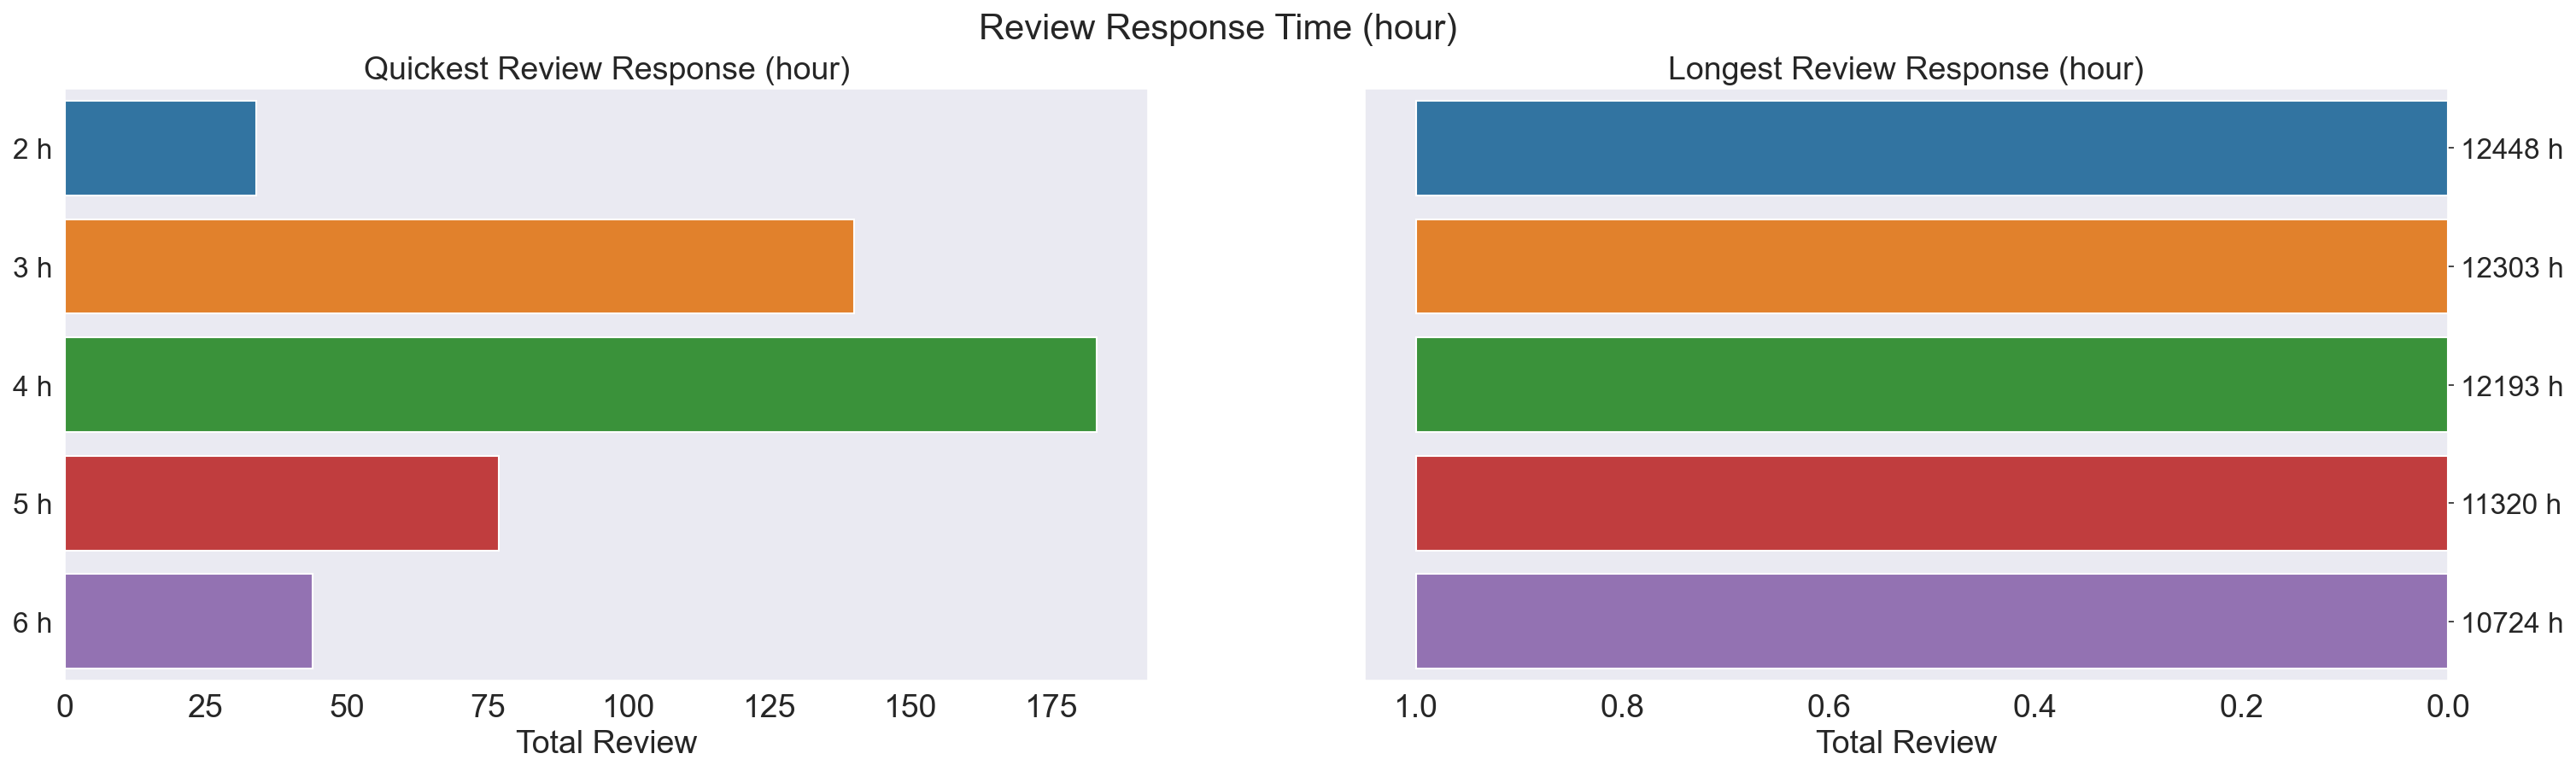

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(
    x="order_id", y="label", data=reviews_answered.head(), ax=ax[0], hue="label"
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Review", fontsize=18)
ax[0].set_title("Quickest Review Response (hour)", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="label",
    data=reviews_answered.sort_values(
        by="reviews_answered_hours", ascending=False
    ).head(),
    ax=ax[1],
    hue="label",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Review", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Longest Review Response (hour)", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Review Response Time (hour)", fontsize=20)

### Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?


In [50]:
orders_day = (
    all_df.groupby(["orders_day"])
    .agg({"order_id": "nunique"})
    .sort_values("order_id", ascending=False)
    .reset_index()
)
orders_month = (
    all_df.groupby("orders_month")
    .agg({"order_id": "nunique"})
    .sort_values("order_id", ascending=False)
    .reset_index()
)

Text(0.5, 0.98, 'Most and Least Sales by Month')

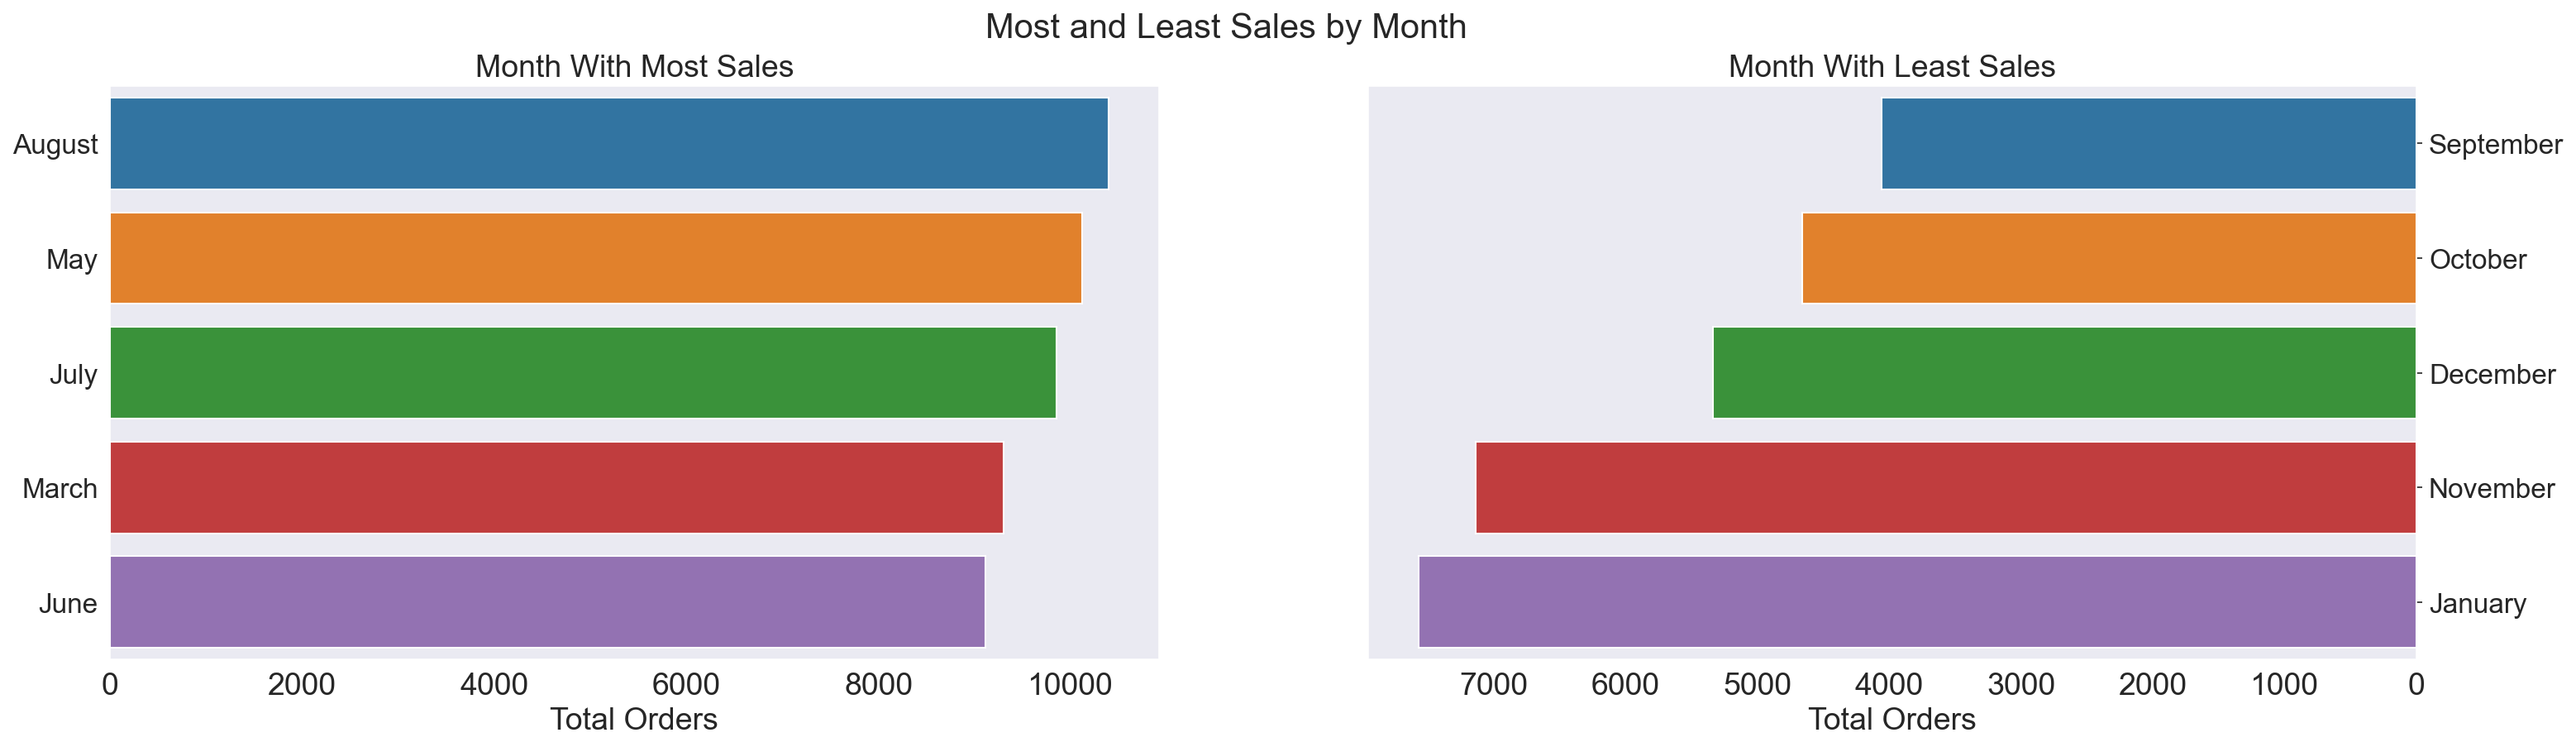

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(
    x="order_id",
    y="orders_month",
    data=orders_month.head(),
    ax=ax[0],
    hue="orders_month",
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Orders", fontsize=18)
ax[0].set_title("Month With Most Sales", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="orders_month",
    data=orders_month.sort_values(by="order_id").head(),
    ax=ax[1],
    hue="orders_month",
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Orders", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Month With Least Sales", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Most and Least Sales by Month", fontsize=20)

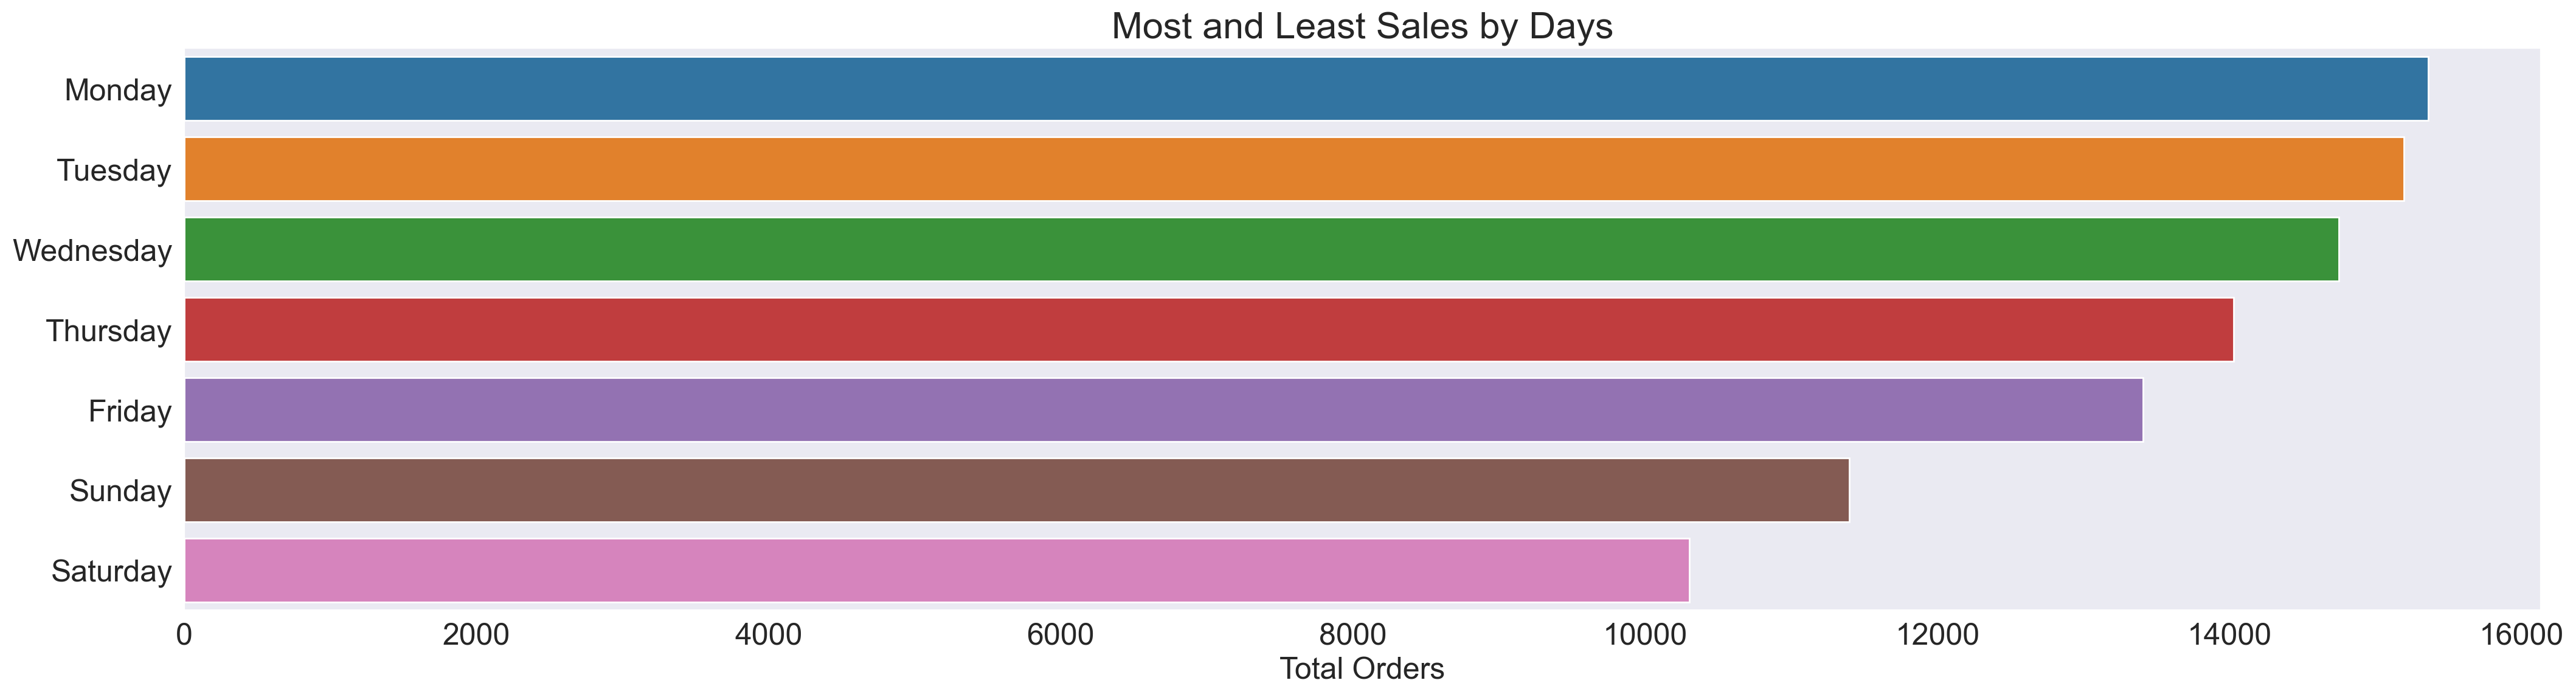

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="order_id",
    y="orders_day",
    data=orders_day,
    ax=ax,
    hue="orders_day",
)
ax.set_title("Most and Least Sales by Days", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total Orders", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

### Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?


In [53]:
payment_type = (
    all_df.groupby("payment_type")
    .agg({"order_id": "nunique"})
    .sort_values("order_id", ascending=False)
    .reset_index()
)

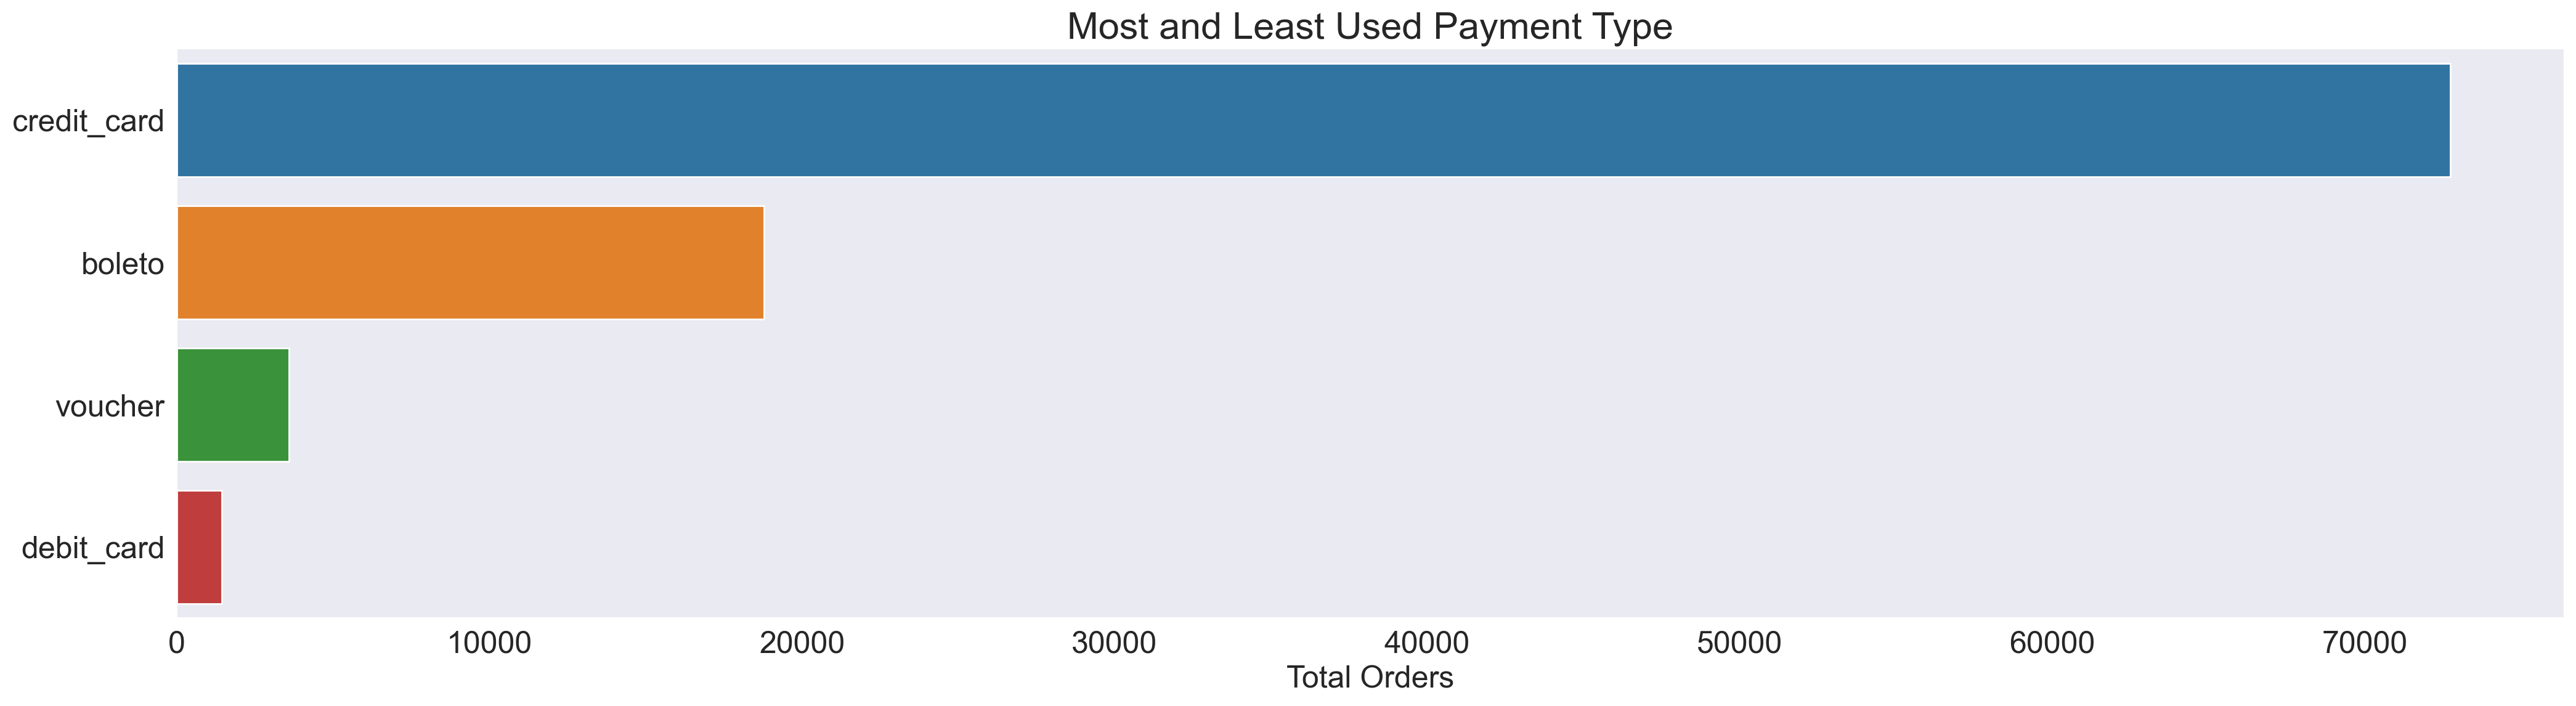

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="order_id",
    y="payment_type",
    data=payment_type,
    ax=ax,
    hue="payment_type",
)
ax.set_title("Most and Least Used Payment Type", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total Orders", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

### Pertanyaan 10: Bagaimanakah demografi customer ?


In [55]:
customer_city = (
    all_df.groupby("customer_city")
    .agg({"customer_id": "nunique"})
    .sort_values("customer_id", ascending=False)
    .reset_index()
)
customer_state = (
    all_df.groupby("customer_state")
    .agg({"customer_id": "nunique"})
    .sort_values("customer_id", ascending=False)
    .reset_index()
)

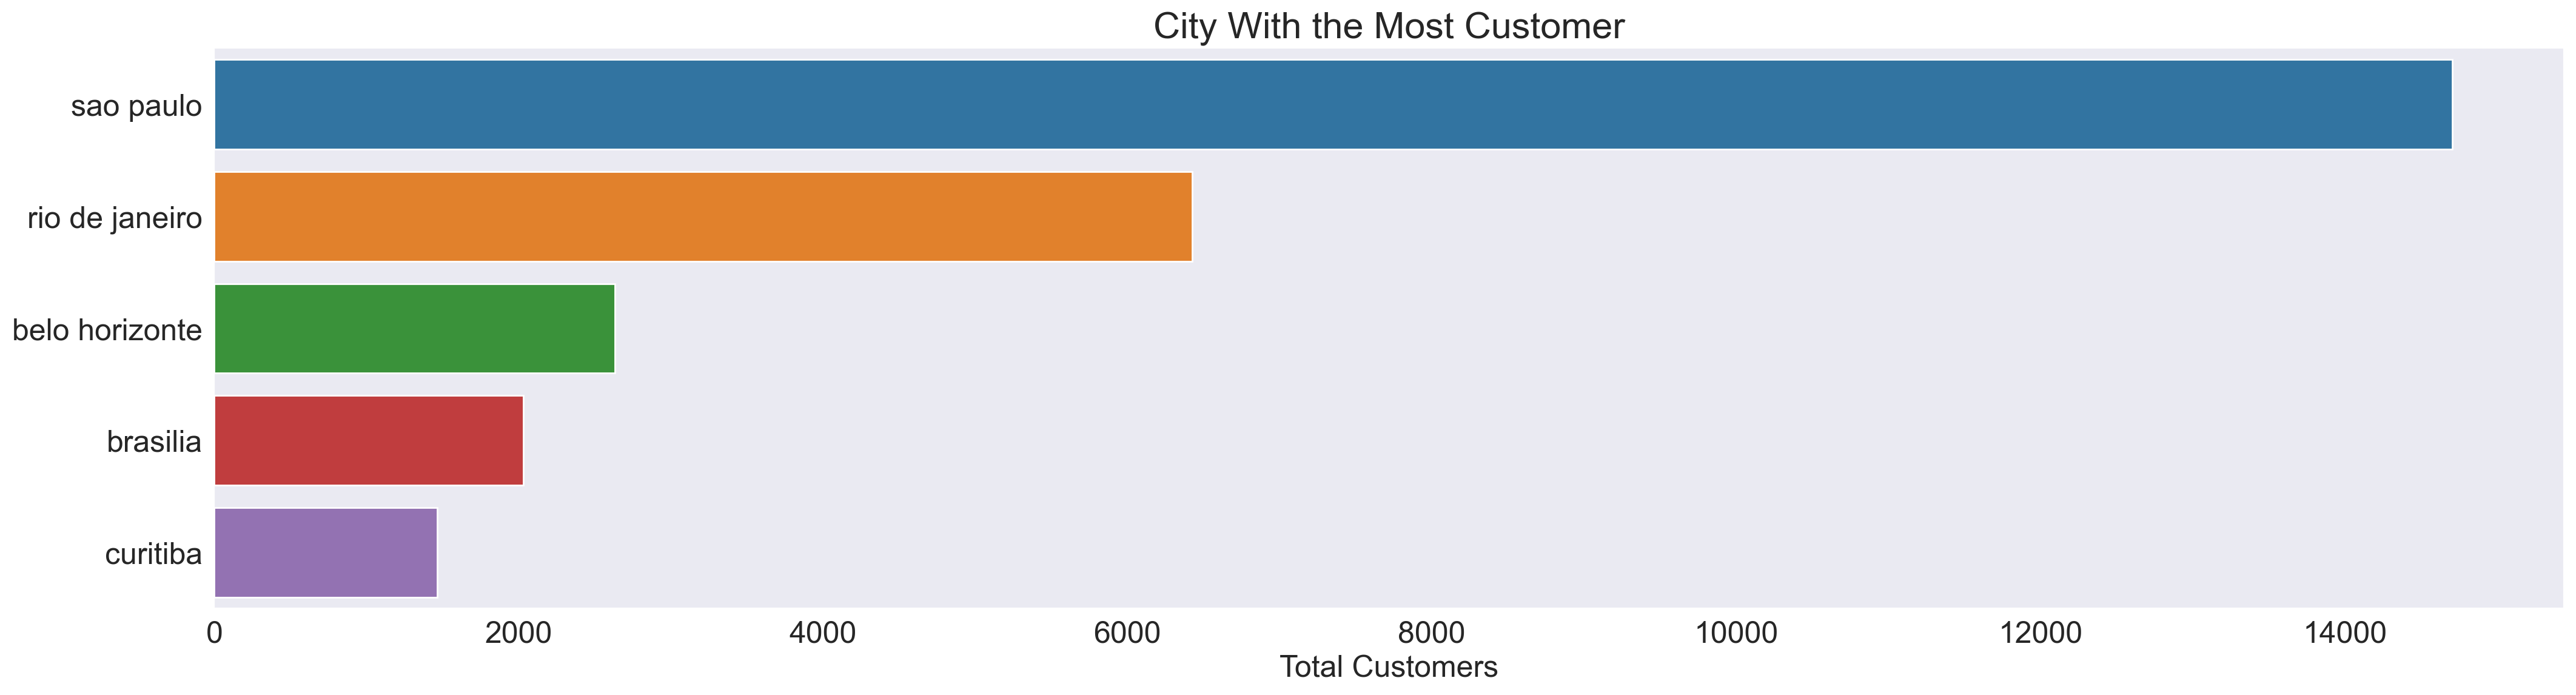

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="customer_id",
    y="customer_city",
    data=customer_city.head(),
    ax=ax,
    hue="customer_city",
)
ax.set_title("City With the Most Customer", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total Customers", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

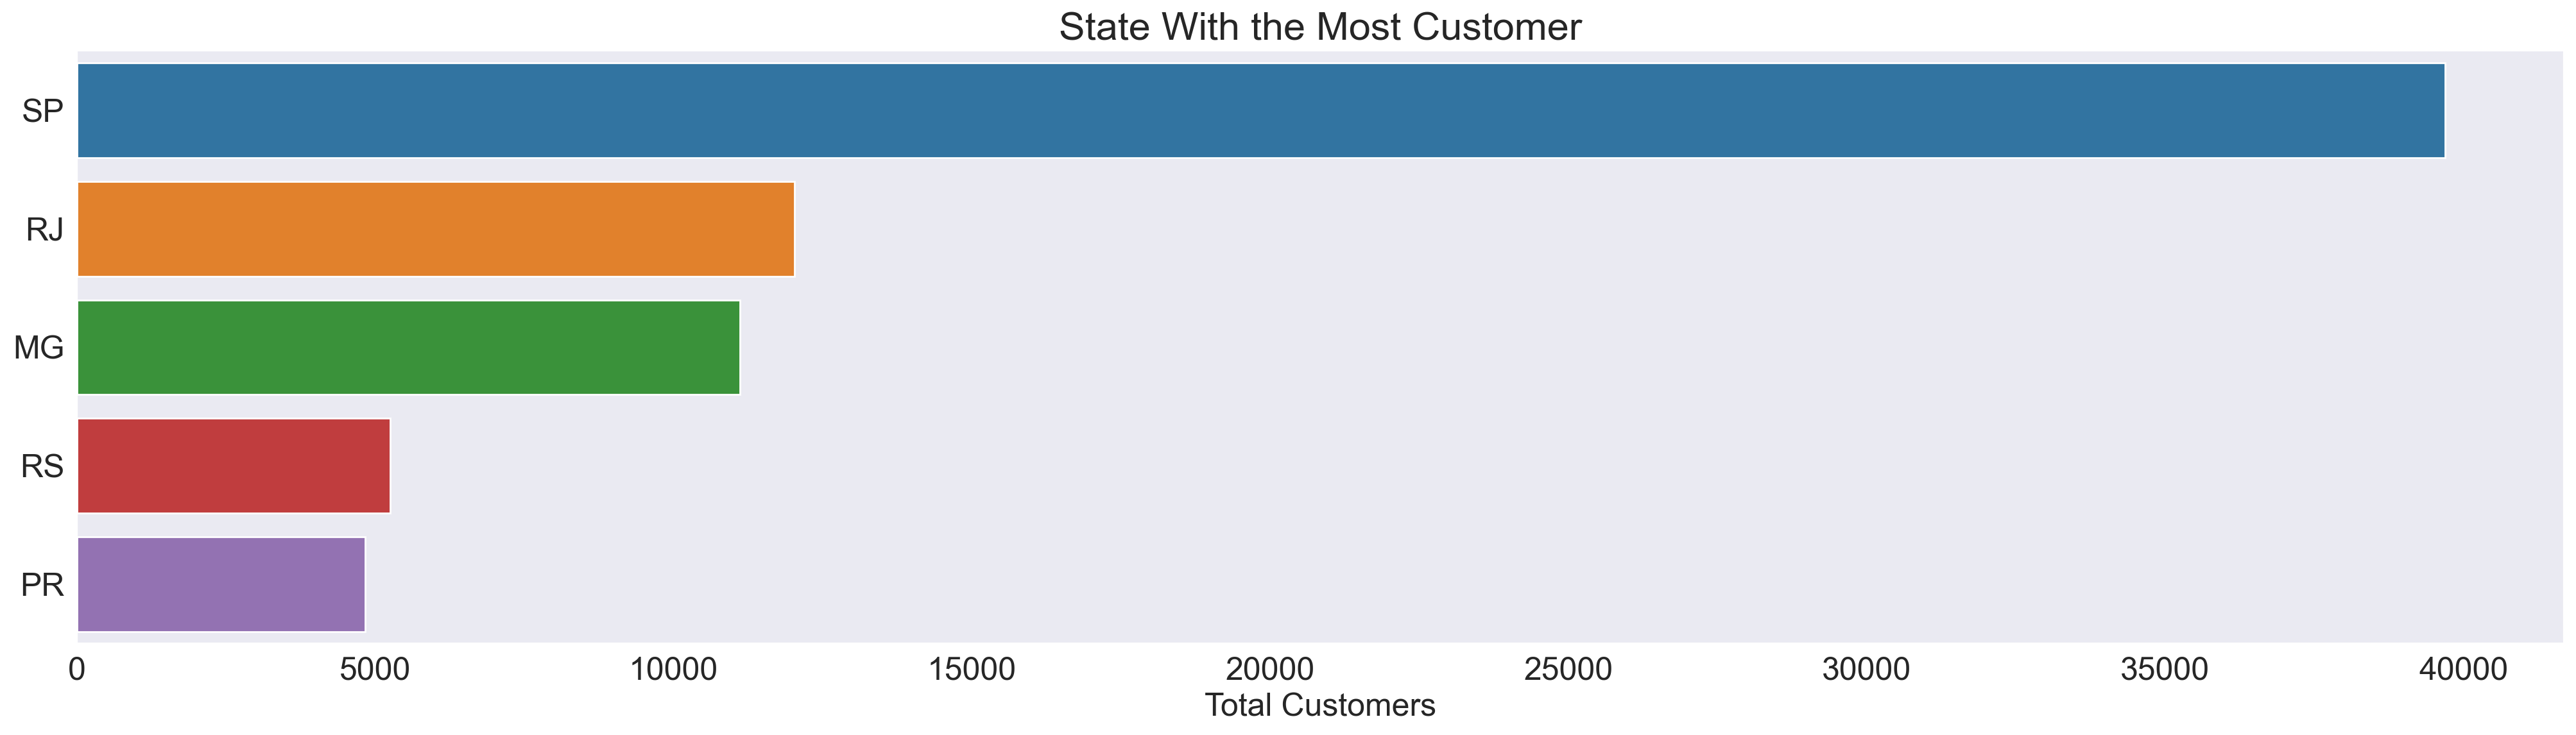

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="customer_id",
    y="customer_state",
    data=customer_state.head(),
    ax=ax,
    hue="customer_state",
)
ax.set_title("State With the Most Customer", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total Customers", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

### Analisa Geospasial Menggunakan Geopandas Untuk Melihat Sebaran Customer Secara Geografi


In [58]:
customer_demography = pd.merge(
    all_df,
    geolocation_unique,
    left_on=["customer_zip_code_prefix", "customer_city", "customer_state"],
    right_on=[
        "geolocation_zip_code_prefix",
        "geolocation_city",
        "geolocation_state",
    ],
)
customer_demography = customer_demography[
    ~customer_demography.customer_id.duplicated()
].reset_index(drop=True)[
    [
        "customer_zip_code_prefix",
        "customer_city",
        "customer_state",
        "geolocation_lng",
        "geolocation_lat",
    ]
]

customer_demography["geometry"] = customer_demography.apply(
    lambda row: Point(row["geolocation_lng"], row["geolocation_lat"]), axis=1
)


In [59]:
geo_df = gpd.GeoDataFrame(customer_demography, geometry="geometry")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


C:\Users\hp\AppData\Local\Temp\ipykernel_13436\4181986699.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Text(0.5, 1.0, 'Customer Geographical Distribution')

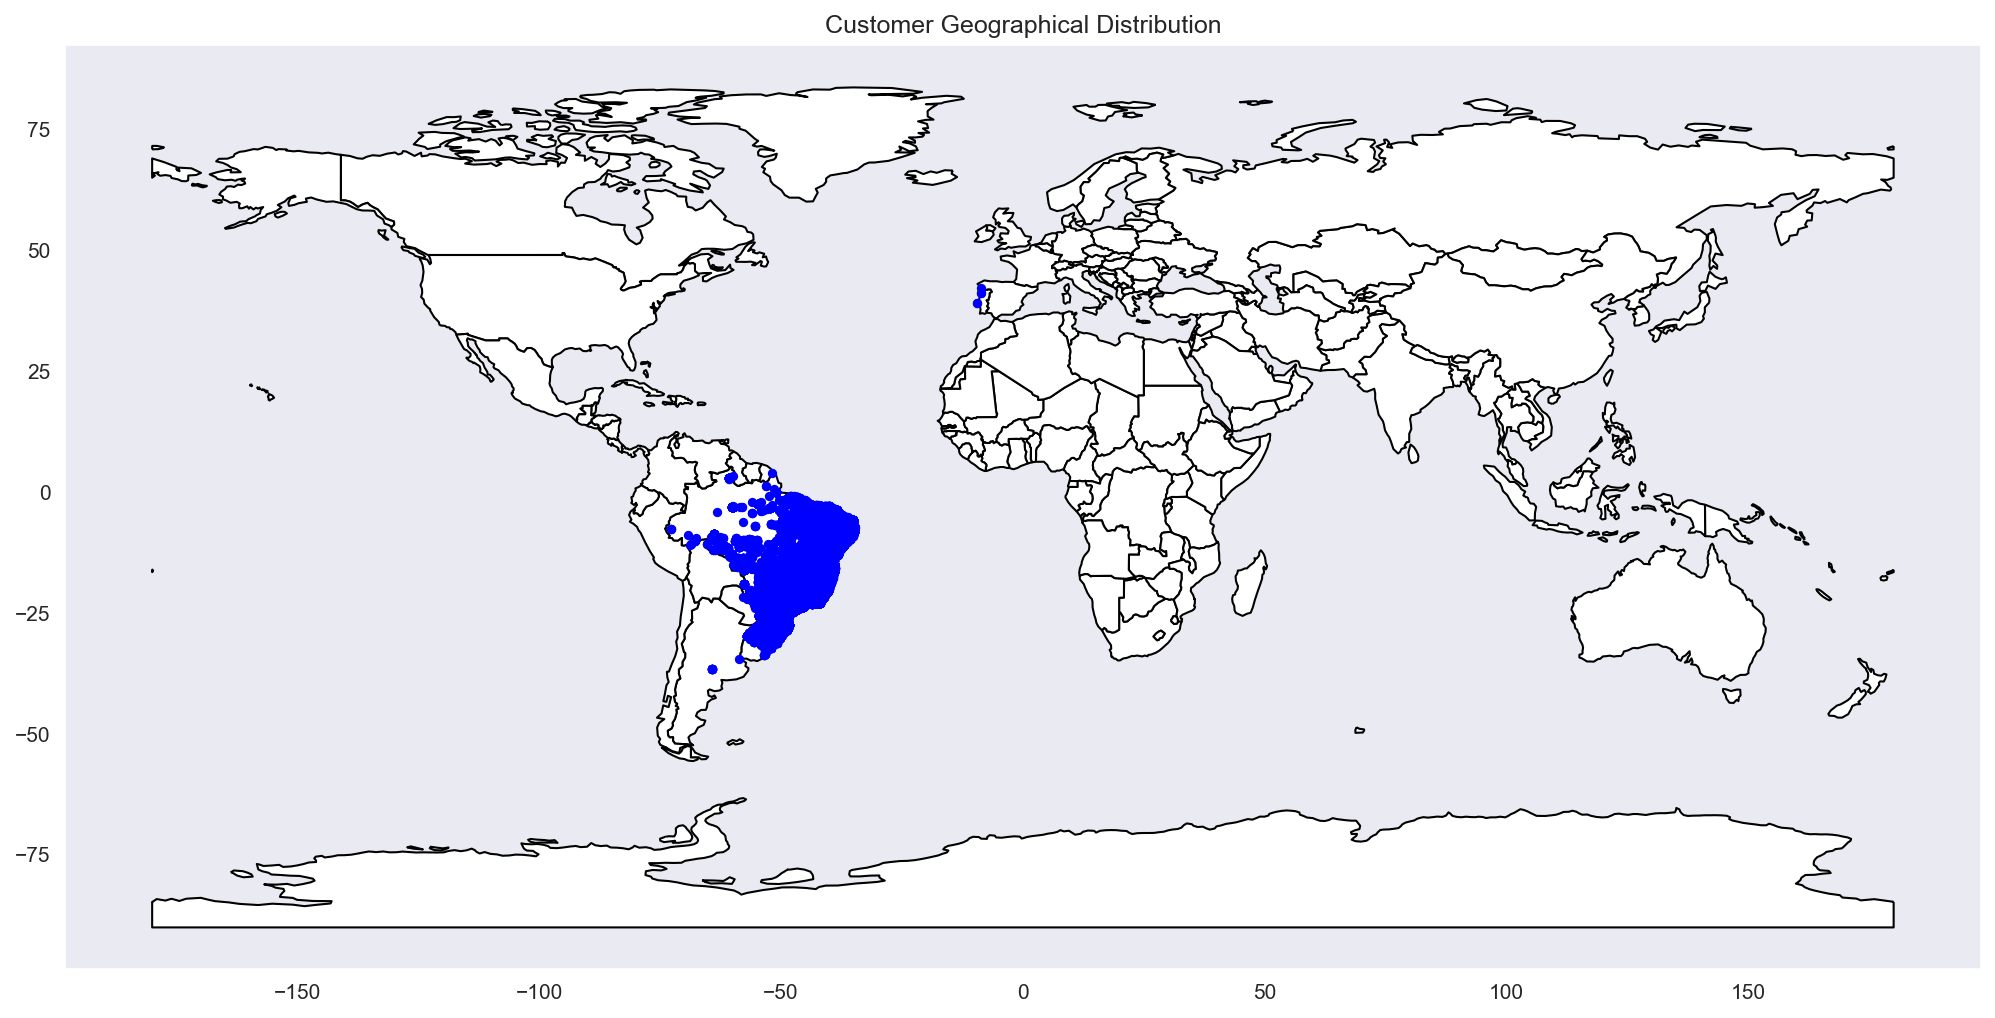

In [60]:
fig, ax = plt.subplots(figsize=(26, 8), dpi=150)
world.plot(ax=ax, color="white", edgecolor="black")
geo_df.plot(ax=ax, markersize=12, color="blue", marker="o")
plt.title("Customer Geographical Distribution")


### Pertanyaan 11: Bagaimanakah demografi seller ?


In [61]:
seller_city = (
    all_df.groupby("seller_city")
    .agg({"seller_id": "nunique"})
    .sort_values("seller_id", ascending=False)
    .reset_index()
)
seller_state = (
    all_df.groupby("seller_state")
    .agg({"seller_id": "nunique"})
    .sort_values("seller_id", ascending=False)
    .reset_index()
)

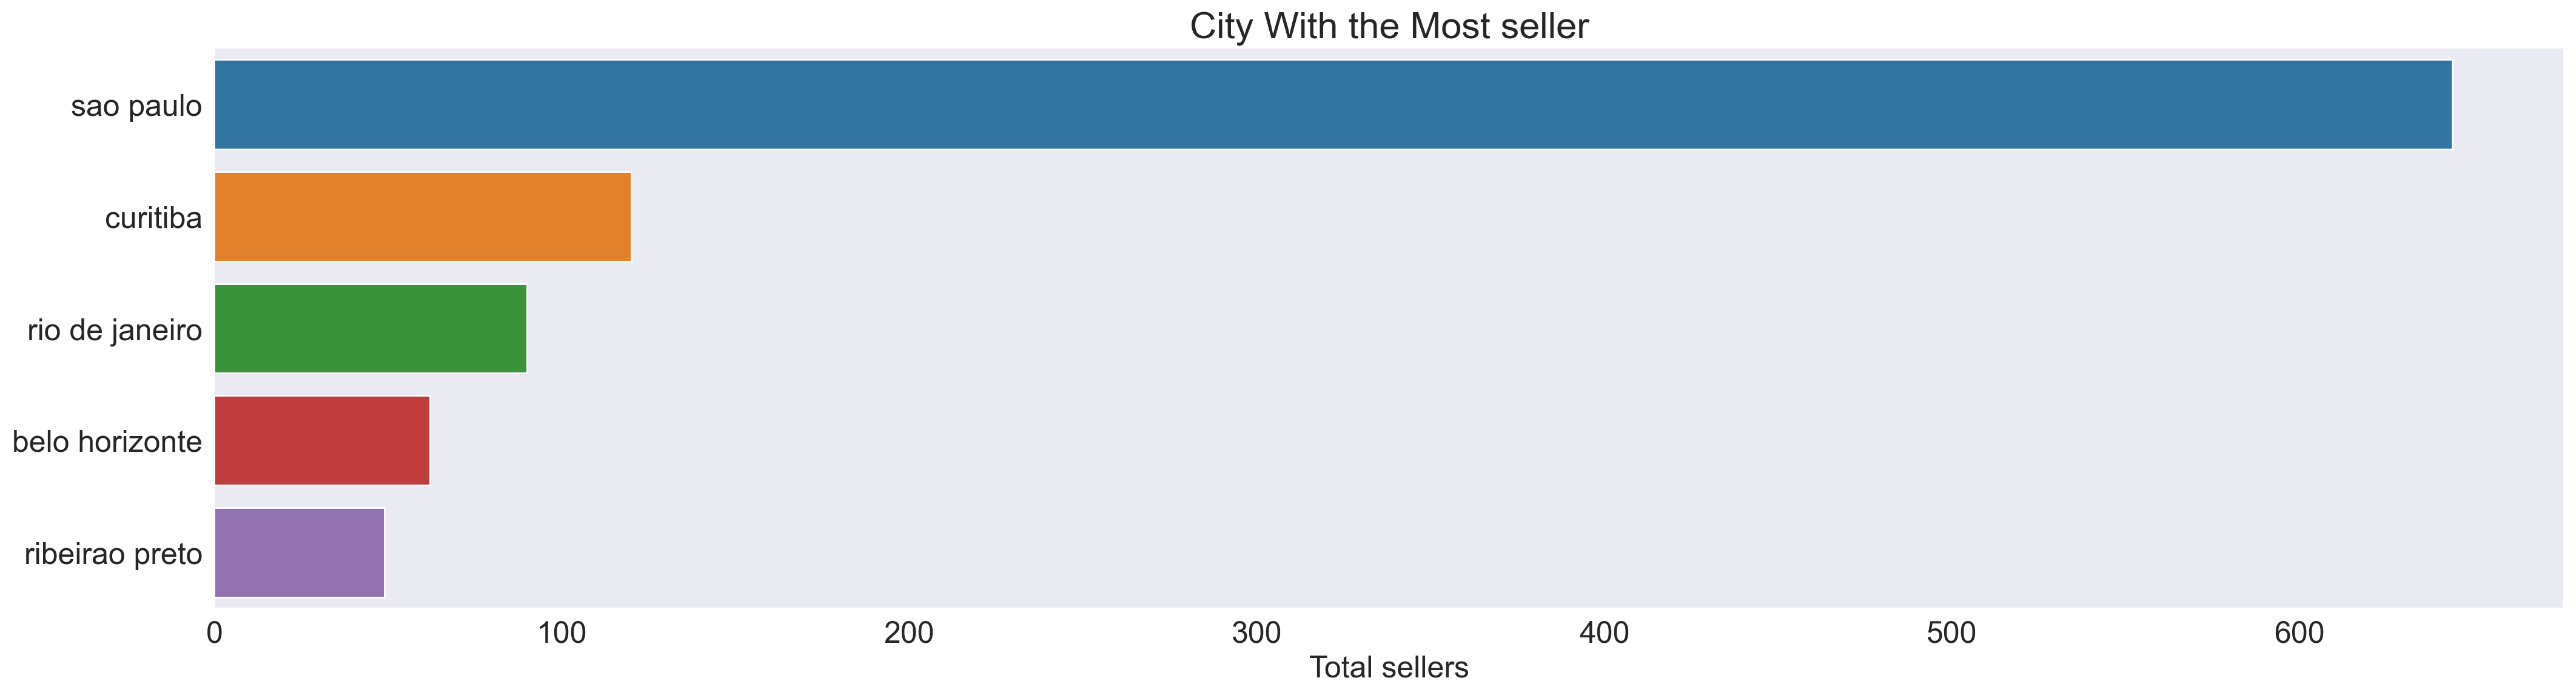

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="seller_id", y="seller_city", data=seller_city.head(), ax=ax, hue="seller_city"
)
ax.set_title("City With the Most seller", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total sellers", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

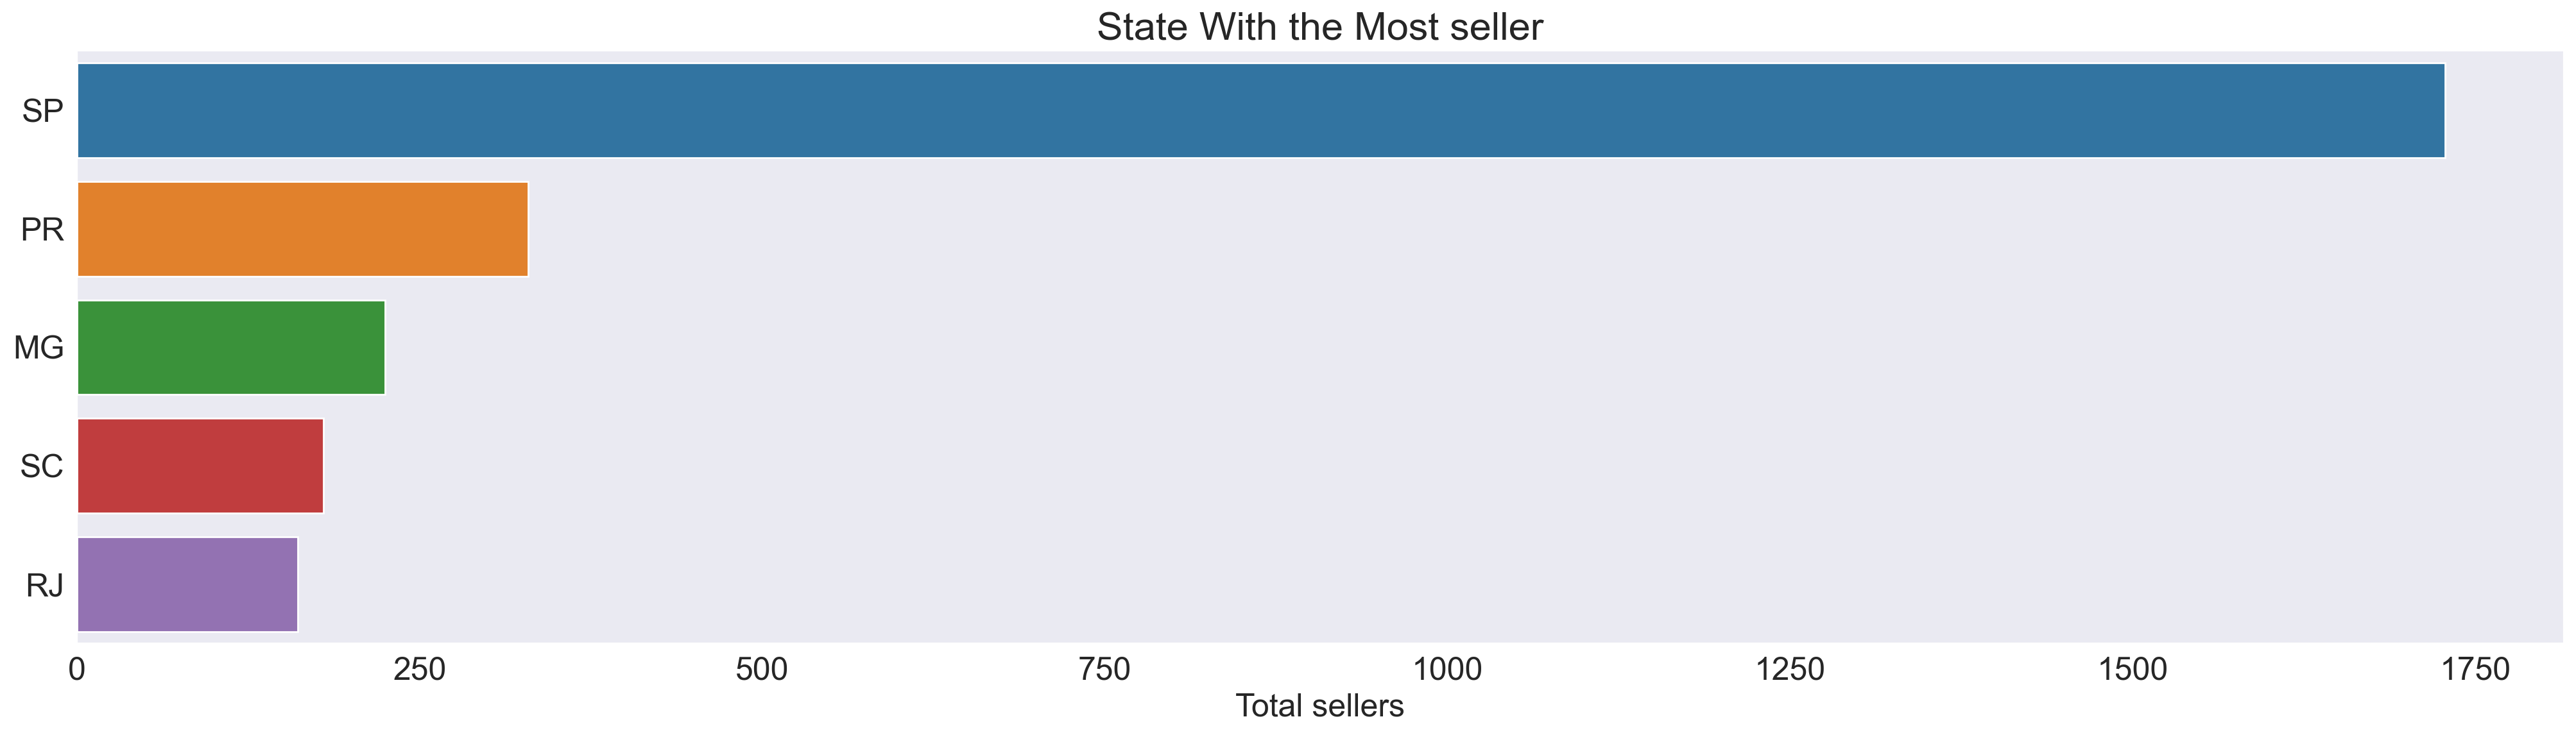

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6), dpi=200)
sns.barplot(
    x="seller_id", y="seller_state", data=seller_state.head(), ax=ax, hue="seller_state"
)
ax.set_title("State With the Most seller", fontsize=22)
ax.set_ylabel(None)
ax.set_xlabel("Total sellers", fontsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)

### Analisa Geospasial Menggunakan Geopandas Untuk Melihat Sebaran Seller Secara Geografi


In [64]:
seller_demography = pd.merge(
    all_df,
    geolocation_unique,
    left_on=["seller_zip_code_prefix", "seller_city", "seller_state"],
    right_on=[
        "geolocation_zip_code_prefix",
        "geolocation_city",
        "geolocation_state",
    ],
)
seller_demography = seller_demography[
    ~seller_demography.seller_id.duplicated()
].reset_index(drop=True)[
    [
        "seller_zip_code_prefix",
        "seller_city",
        "seller_state",
        "geolocation_lng",
        "geolocation_lat",
    ]
]

seller_demography["geometry"] = seller_demography.apply(
    lambda row: Point(row["geolocation_lng"], row["geolocation_lat"]), axis=1
)


In [65]:
geo_df = gpd.GeoDataFrame(seller_demography, geometry="geometry")

Text(0.5, 1.0, 'Seller Geographical Distribution')

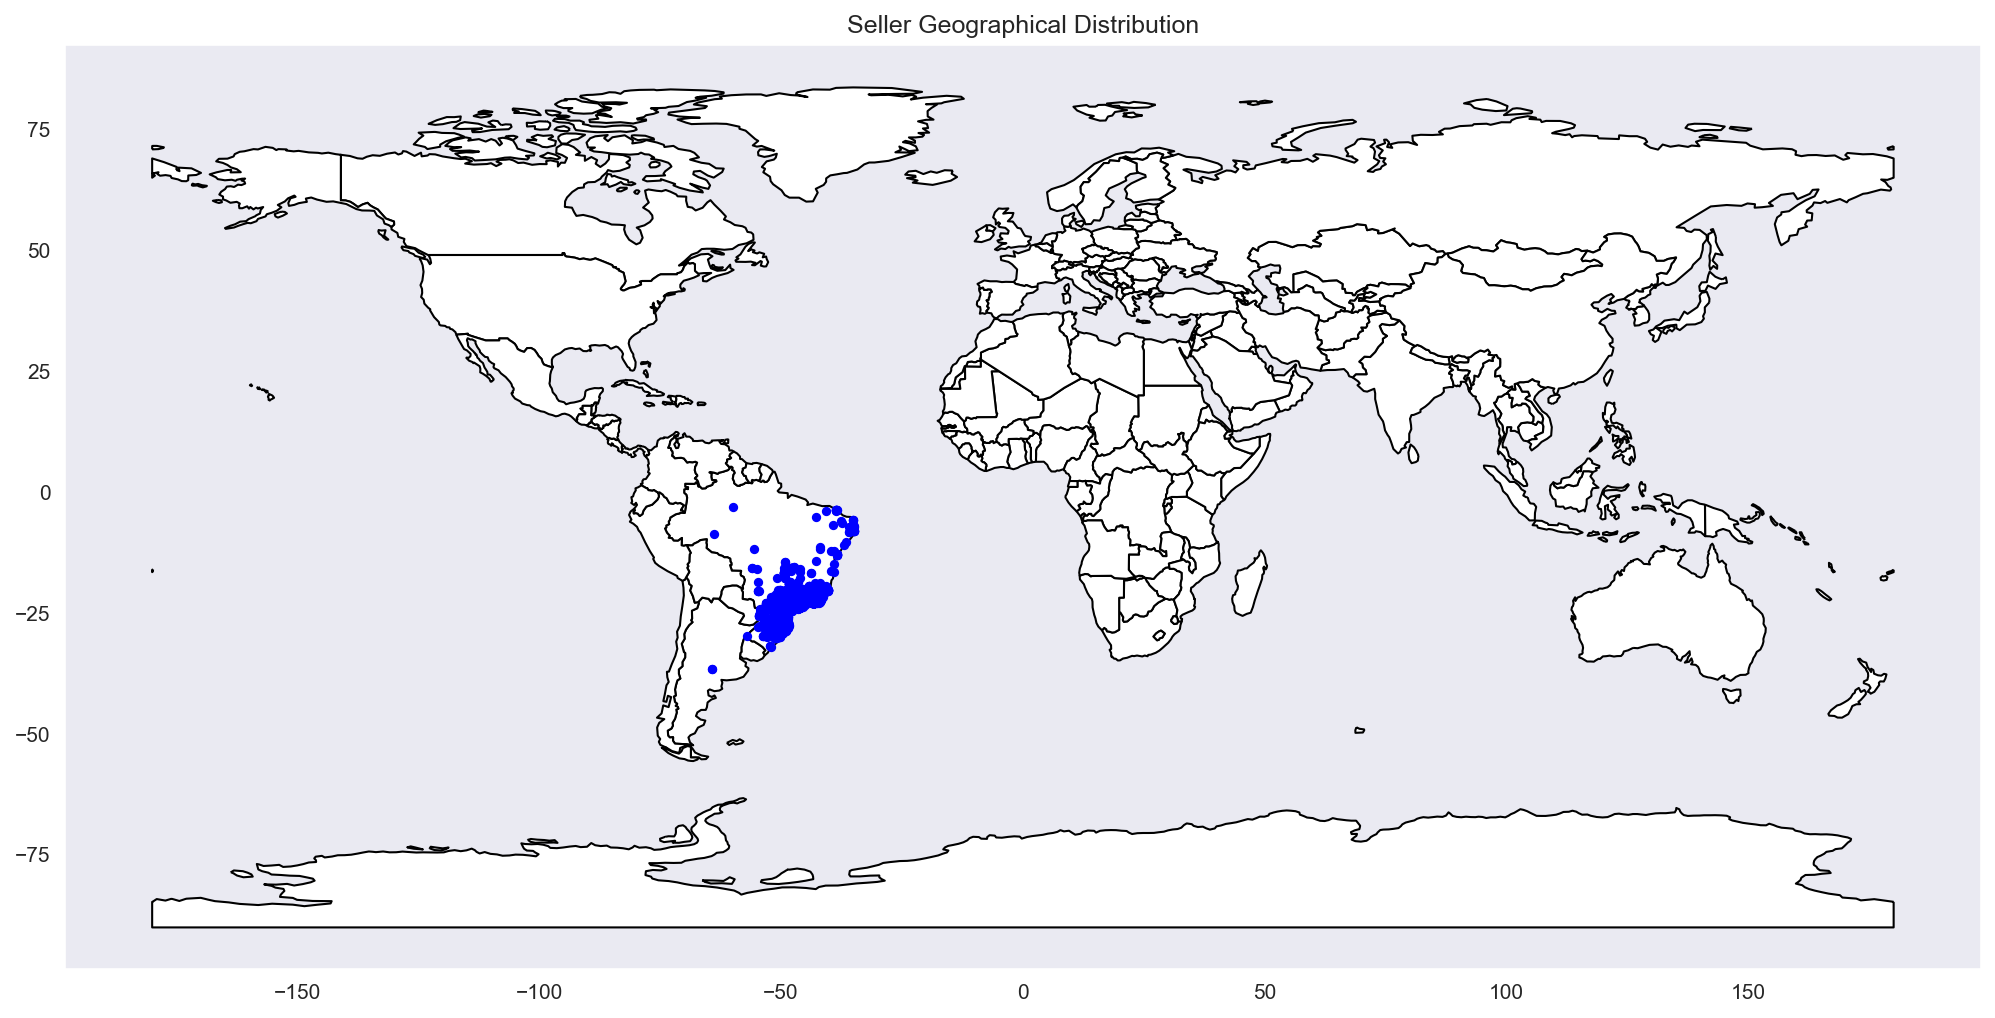

In [66]:
fig, ax = plt.subplots(figsize=(26, 8), dpi=150)
world.plot(ax=ax, color="white", edgecolor="black")
geo_df.plot(ax=ax, markersize=12, color="blue", marker="o")
plt.title("Seller Geographical Distribution")


## Conclusion


### Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual ?

Produk yang paling banyak terjual adalah produk yang dibutuhkan dalam kehidupan sehari-hari seperti; kasur, meja, skincare, barang sports, aksesoris komputer, dan dekorasi furnitur. Sedangkan produk yang paling sedikit terjual merupakan produk yang sangat spesifik seperti; security services, pakaian fashion anak-anak, la cuisine, cd/dvd musik, dan barang seni


### Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?

Produk dengan rating tertinggi adalah; pakaian anak-anak, cd/dvd musik, buku import, buku general, dan oven. Jika kita lihat, beberapa produk tersebut merupakan produk dengan penjualan paling sedikit, sehingga review yang sedikit akan membuat overall ratingnya menjadi tinggi. Sedangkan produk dengan rating terkecil adalah; security services, popok, dll (dapat dilihat pada visualisasi)


### Pertanyaan 3: Di kota manakah order paling banyak ?

Sao Paulo merupakan kota yang melakukan order paling banyak, 53.9% order berasal dari Sao Paulo, yang berarti setengah dari keselurahan order terdapat di Sao Paulo. Kota dengan order terbanyak kedua adalah Rio De Janeiro dengan nilai 23.6%.


### Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?

Sesuai dengan data order terbanyak, maka revenue terbesar juga terdapat pada kota Sao Paulo. Namun, kota dengan revenue terbesar kedua bukanlah Rio De Janeiro, melainkan Ibitinga. Sedangkan kota dengan revenue terkecil adalah Palotina


### Pertanyaan 5: Berapa lama order customer diterima oleh seller ?

Waktu proses order tercepat oleh seller semuanya berada di bawah 10 menit, dengan waktu tercepat adalah 0 menit atau bisa dibilang langsung diproses, jumlahnya juga tidak sedikit yang berarti seller sangat cepat dalam merespon order. Sedangkan waktu proses order terlama mencapai 741 jam atau hampir 1 bulan, namun waktu respon tersebut hanya terjadi pada 1 order.


### Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?

Pengiriman tercepat tidak sampai 1 hari atau dalam beberapa jam saja sudah sampai, pengiriman tercepat selanjutnya berada pada jarak 1-4 hari atau kurang dari 1 minggu. Sedangkan untuk pengiriman terlama mulai dari 187 hari hingga 205 hari atau setengah tahun lebih, namun hal tersebut hanya terjadi pada 1 order.


### Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?

Review yang paling cepat dibalas berada dalam range 2-6 jam, sedangkan review yang paling lama dibalas hingga mencapai 12448 jam atau 518 hari.


### Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?

Berdasarkan bulan, order paling banyak dilakukan pada bulan Agustus dan Mei, sedangkan pada bulan September dan Oktober order paling sedikit dilakukan. Berdasarkan hari, order paling banyak dilakukan pada hari Senin dan Selasa, sedangkan order paling sedikit dilakukan pada hari Sabtu dan Minggu. Hal ini cukup mengejutkan, karna biasanya orang berbelanja pada weekend.


### Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?

Customer paling banyak menggunakan credit card sebagai metode pembayaran, sedangkan debit card adalah metode pembayaran yang paling sedikit digunakan


### Pertanyaan 10: Bagaimanakah demografi customer ?

Sesuai dengan jumlah order terbanyak yang terdapat di kota Sao Paulo dan Rio De Janeiro, begitu pula persebaran customer berdasarkan kota. Sebagian besar customer berasal dari kota Sao Paulo dan Rio De Janeiro


### Pertanyaan 11: Bagaimanakah demografi seller ?

Kota dengan jumlah seller terbanyak juga terdapat di Sao Paulo. Selain Sao Paulo, kota Curitiba dan Rio De Janeiro juga menduduki peringkat 2 dan 3 sebagai kota dengan jumlah seller terbanyak
